In [20]:
%%capture
from kls import bdh, bdh_bulk, get_kls_series
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import datetime
from bbg.sapi import BbgSapi
sapi = BbgSapi()
from collections import defaultdict

In [21]:
# IF CAN FIND A LINK, USE THIS

df = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv')

In [22]:
#lol = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].last().sort_values('total_vaccinations_per_hundred', ascending = True)

In [23]:
# COUNTRIES TO REMOVE

#df.location.unique()

df = df[~df.location.isin(['England', 'Northern Ireland', 'Scotland', 'Wales', 'Algeria', 'Austria', 'Belgium', 'Croatia', 'Ecuador', 'Estonia', 'Finland', 'Iceland', 'Isle of Man', 'Latvia', 'Luxembourg', 'Myanmar', 'Northern Cyprus', 'Bermuda', 'Bulgaria', 'Cyprus', 'Denmark', 'Gibraltar', 'Lithuania', 'Malta', 'Morocco', 'Netherlands', 'Panama', 'Seychelles', 'Slovakia', 'Oman', 'Slovenia', 'Sri Lanka', 'Kuwait', 'Serbia', 'Bahrain', 'Andorra', 'Nepal', 'Guernsey', 'Cayman Islands', 'Lichtenstein', 'Monaco', 'Maldives', 'Jersey', 'Greenland', 'Bangladesh', 'Faeroe Islands', 'Saint Helena', 'Bolivia', 'Liechtenstein', 'Anguilla', 'Turks and Caicos Islands', 'Qatar', 'Iran', 'Cambodia', 'Pakistan', 'Azerbaijan', 'Mauritius', 'Albania', 'Guyana', 'Dominican Republic', 'Macao', 'Barbados', 'Greece', 'United Arab Emirates', 'Falkland Islands', 'Belarus', 'Ireland', 'Lebanon', 'Zimbabwe', 'Trinidad and Tobago', 'El Salvador', 'Paraguay', 'Ukraine', 'Venezuela', 'Kazakhstan', 'Montenegro', 'Senegal', 'San Marino', 'Guatemala', 'Jordan', 'Uruguay', 'Romania', 'Montserrat', 'Mongolia', 'Honduras', 'Belize', 'Ghana', 'Grenada', 'Rwanda', 'Saint Lucia', 'Dominica', 'Moldova', "Cote d'Ivoire", 'Uganda', 'Angola', 'Vietnam', 'Kenya', 'Tunisia'])]

df_full = df[['date', 'location', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']]



df_full = df_full.groupby(['location'], as_index=False).apply(lambda x: x.ffill())

df.fillna(method='ffill', inplace=True)

df.date = df.date.astype(str)


## * SUMMARY *

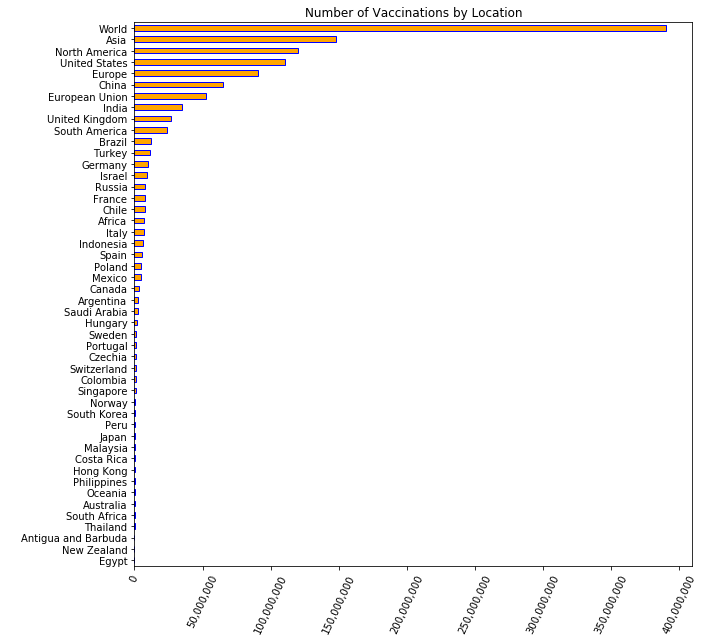

In [24]:
summary_1 = df.groupby(df.location)[['location', 'total_vaccinations']].last().sort_values('total_vaccinations', ascending = True)

ax = summary_1.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')

ax.get_legend().remove();
ax.tick_params(axis = 'x', rotation = 65);
ax.set_ylabel(' ');
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('Number of Vaccinations by Location');

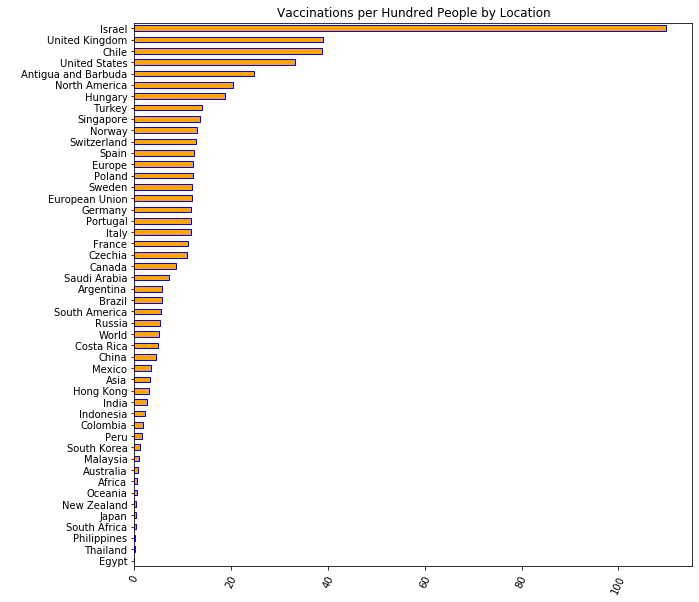

In [25]:
summary_2 = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].last().sort_values('total_vaccinations_per_hundred', ascending = True)

#summary_2 = summary_2[summary_2.location.isin(['Chile', 'Colombia', 'Mexico', 'Brazil', 'Peru'])]

ax = summary_2.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')

ax.get_legend().remove();
ax.tick_params(axis = 'x', rotation = 65);
ax.set_ylabel(' ');
#ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('Vaccinations per Hundred People by Location');

In [26]:
# # LOOKS AT VAX PER HUNDRED BUT EXCLUDING THE HIGH FLIERS

# ex_high_fly = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].last().sort_values('total_vaccinations_per_hundred', ascending = True)

# ex_high_fly = ex_high_fly[~ex_high_fly.location.isin(['United States', 'Israel', 'United Arab Emirates', 'United Kingdom'])]

# ax = ex_high_fly.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')

# ax.get_legend().remove();
# ax.tick_params(axis = 'x', rotation = 65);
# ax.set_ylabel(' ');

# ax.set_title('Vaccinations per Hundred People by Location (EXCLUDING HIGH FLYING DM)');

In [27]:
# # LOOKS AT VAX PER HUNDRED BUT EXCLUDING THE HIGH FLIERS

# ex_high_fly = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].last().sort_values('total_vaccinations_per_hundred', ascending = True)
# ex_high_fly_1w = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].nth(-10).sort_values('total_vaccinations_per_hundred', ascending = True)

# ex_high_fly = ex_high_fly[~ex_high_fly.location.isin(['Romania', 'Switzerland', 'Greece', 'Norway', 'Spain', 'Ireland', 'Portugal', 'Italy', 'Germany', 'European Union', 'Sweden', 'France', 'Canada', 'World', 'Costa Rica', 'Saudi Arabia', 'Japan', 'United States', 'Israel', 'United Arab Emirates', 'United Kingdom'])]
# ex_high_fly_1w = ex_high_fly_1w[~ex_high_fly_1w.location.isin(['Romania', 'Switzerland', 'Greece', 'Norway', 'Spain', 'Ireland', 'Portugal', 'Italy', 'Germany', 'European Union', 'Sweden', 'France', 'Canada', 'World', 'Costa Rica', 'Saudi Arabia', 'Japan', 'United States', 'Israel', 'United Arab Emirates', 'United Kingdom'])]

# ax = ex_high_fly_1w.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')
# ax2 = ex_high_fly.plot(kind = 'barh', color = 'blue', edgecolor='yellow')


# # ax.get_legend().remove();
# # ax.tick_params(axis = 'x', rotation = 65);
# # ax.set_ylabel(' ');

# ax.set_title('EM Vaccinations per Hundred People by Location (EXCLUDING HIGH FLYING DM)');

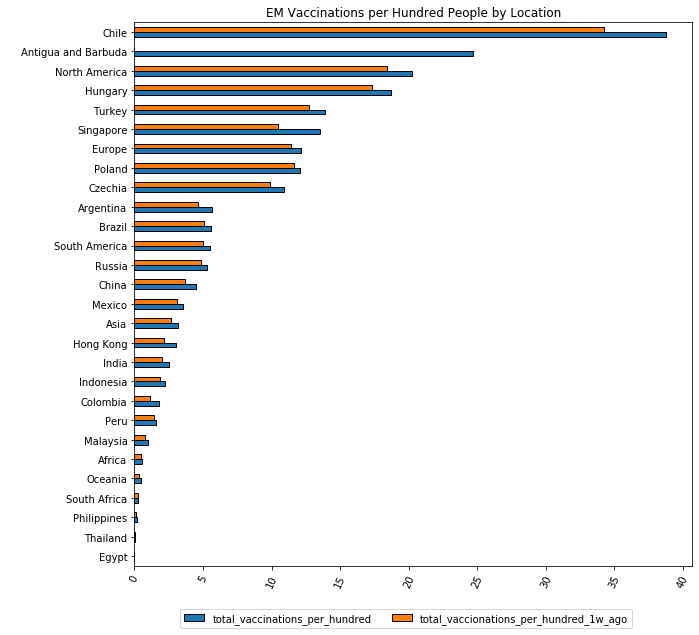

In [28]:
# THIS IS THE GOOD ONE 

ex_high_fly = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].last().sort_values('total_vaccinations_per_hundred', ascending = True)
ex_high_fly_1w = df.groupby(df.location)[['location', 'total_vaccinations_per_hundred']].nth(-5).sort_values('total_vaccinations_per_hundred', ascending = True)

ex_high_fly_1w.columns = (['location', 'total_vaccionations_per_hundred_1w_ago'])

ex_high_fly = ex_high_fly[~ex_high_fly.location.isin(['Romania', 'Switzerland', 'Greece', 'Norway', 'Spain', 'Ireland', 'Portugal', 'Italy', 'Germany', 'European Union', 'Sweden', 'France', 'Canada', 'World', 'Costa Rica', 'Saudi Arabia', 'Japan', 'United States', 'Israel', 'United Arab Emirates', 'United Kingdom', 'South Korea', 'Australia', 'New Zealand'])]
ex_high_fly_1w = ex_high_fly_1w[~ex_high_fly_1w.location.isin(['Romania', 'Switzerland', 'Greece', 'Norway', 'Spain', 'Ireland', 'Portugal', 'Italy', 'Germany', 'European Union', 'Sweden', 'France', 'Canada', 'World', 'Costa Rica', 'Saudi Arabia', 'Japan', 'United States', 'Israel', 'United Arab Emirates', 'United Kingdom', 'South Korea', 'Australia', 'New Zealand'])]

test_1 = ex_high_fly[['total_vaccinations_per_hundred']]
test_2 = ex_high_fly_1w[['total_vaccionations_per_hundred_1w_ago']]

df.fillna(0, inplace=True)

final = test_1.join(test_2)

ax = final.plot(kind = 'barh', figsize = (10,10), edgecolor='black')

ax.legend(bbox_to_anchor = (0.9, -0.07), ncol = 2)
ax.tick_params(axis = 'x', rotation = 65);
ax.set_ylabel(' ');

ax.set_title('EM Vaccinations per Hundred People by Location');

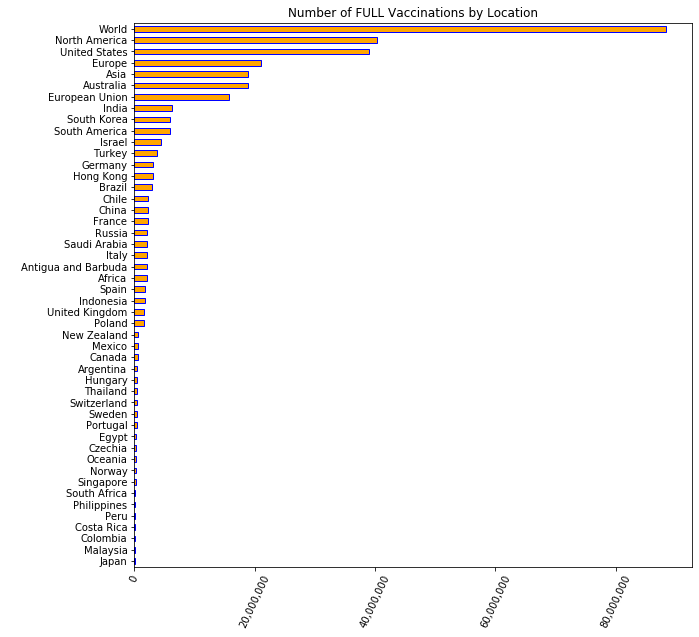

In [29]:
summary_1 = df.groupby(df.location)[['location', 'people_fully_vaccinated']].last().sort_values('people_fully_vaccinated', ascending = True)

ax = summary_1.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')

ax.get_legend().remove();
ax.tick_params(axis = 'x', rotation = 65);
ax.set_ylabel(' ');
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('Number of FULL Vaccinations by Location');

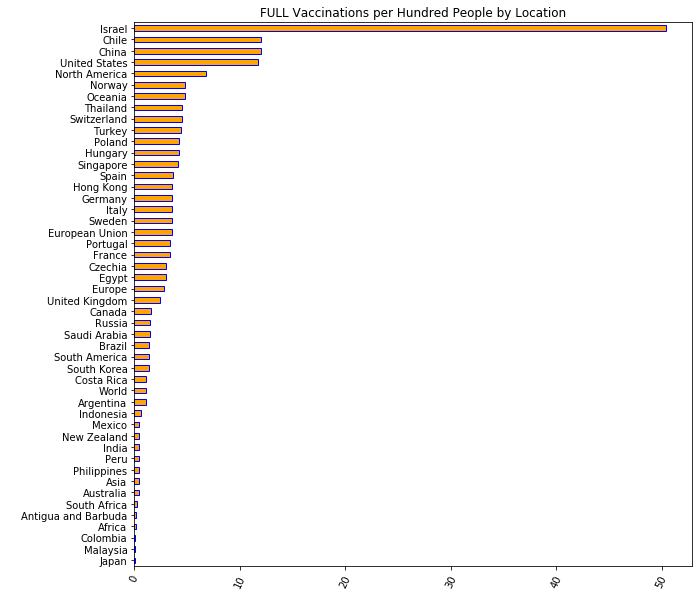

In [30]:
summary_2 = df.groupby(df.location)[['location', 'people_fully_vaccinated_per_hundred']].last().sort_values('people_fully_vaccinated_per_hundred', ascending = True)

ax = summary_2.plot(kind = 'barh', figsize = (10,10), color = 'orange', edgecolor='blue')

ax.get_legend().remove();
ax.tick_params(axis = 'x', rotation = 65);
ax.set_ylabel(' ');
#ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('FULL Vaccinations per Hundred People by Location');

## * WORLD * 

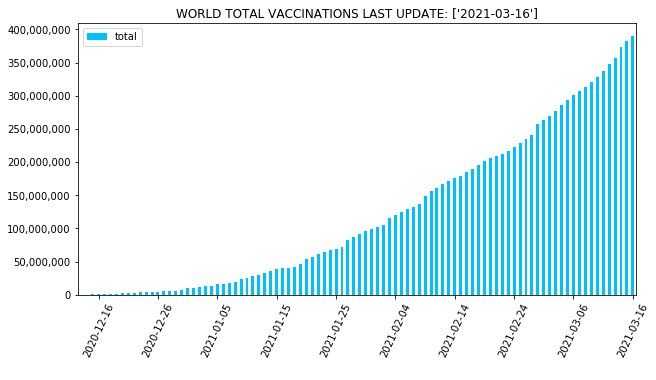

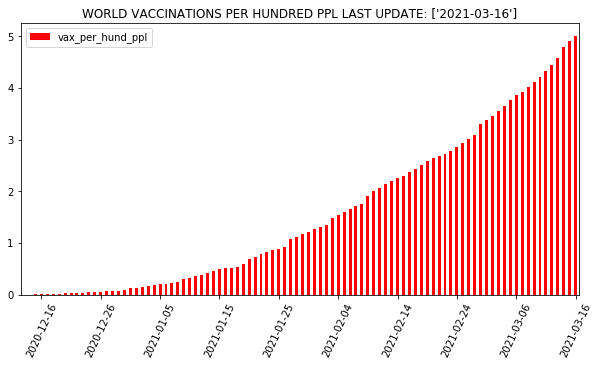

In [31]:
my_list_world = ['World']

for item in my_list_world:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations', label = 'total', color = 'deepskyblue', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' TOTAL VACCINATIONS'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_xticks(ax.get_xticks()[::-10])
    ax.set_xticklabels(list(df.date[::-10]));

for item in my_list_world:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations_per_hundred', label = 'vax_per_hund_ppl', color = 'red', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' VACCINATIONS PER HUNDRED PPL'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.set_xticks(ax.get_xticks()[::-10])
    ax.set_xticklabels(list(df.date[::-10]));
    
    
    
    
    
    

## * UNITED STATES *

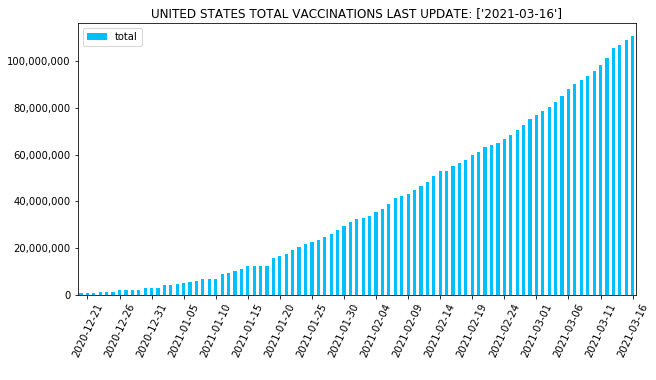

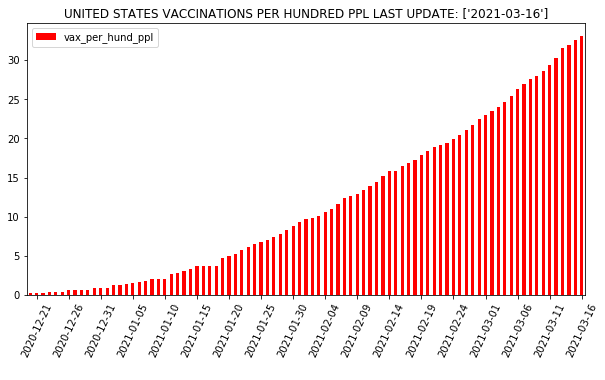

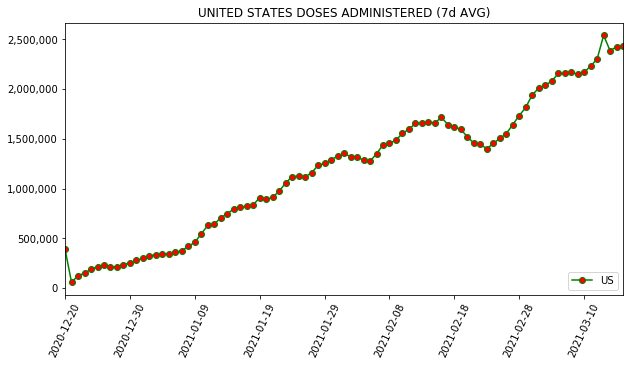

In [32]:
my_list_us = ['United States']

for item in my_list_us:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations', label = 'total', color = 'deepskyblue', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' TOTAL VACCINATIONS'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df.date[::-5]));
    
for item in my_list_us:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations_per_hundred', label = 'vax_per_hund_ppl', color = 'red', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' VACCINATIONS PER HUNDRED PPL'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df[df.location == item].date[::-5]));
    

ax = df[df.location == 'United States'].plot(x = 'date', y = 'daily_vaccinations', label = 'US', figsize = (10,5), color = 'green', marker = 'o', markerfacecolor = 'red')

ax.set_title('UNITED STATES DOSES ADMINISTERED (7d AVG)');
ax.set_xlabel(' ');
ax.tick_params(axis = 'x', rotation = 65);
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
ax.legend(loc = 4);
# ax.set_xticks(ax.get_xticks()[::-1])
# ax.set_xticklabels(list(us.date[::-1]));
# # ax.set_xlim(-1, len(us.daily_vaccinations) + 0.1 )

In [33]:
# ax = df[df.location == 'Chile'].plot(x = 'date', y = 'daily_vaccinations', label = 'CL', figsize = (10,5), color = 'green', marker = 'o', markerfacecolor = 'red')

# ax.set_title('UNITED STATES DOSES ADMINISTERED (7d AVG)');
# ax.set_xlabel(' ');
# ax.tick_params(axis = 'x', rotation = 65);
# ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
# ax.legend(loc = 4);
# ax.set_xticks(ax.get_xticks()[::-1])
# ax.set_xticklabels(list(df.tail(60).date[::-1]));

## * ALL DATA *

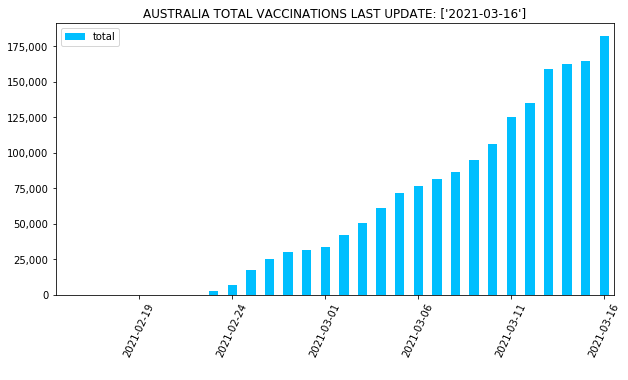

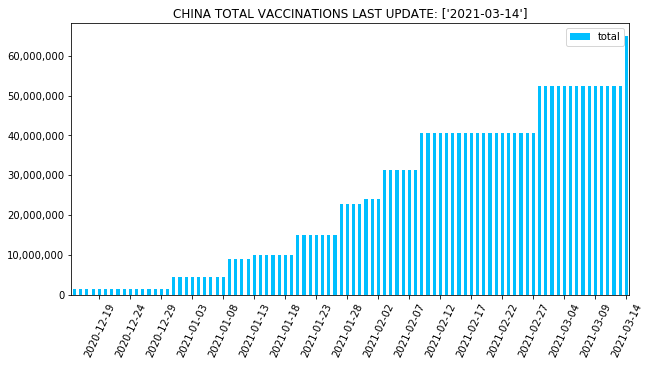

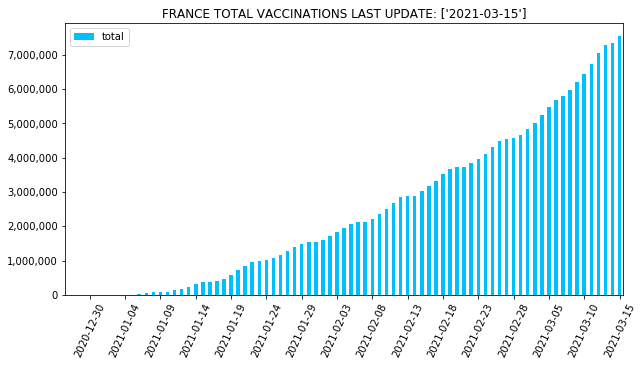

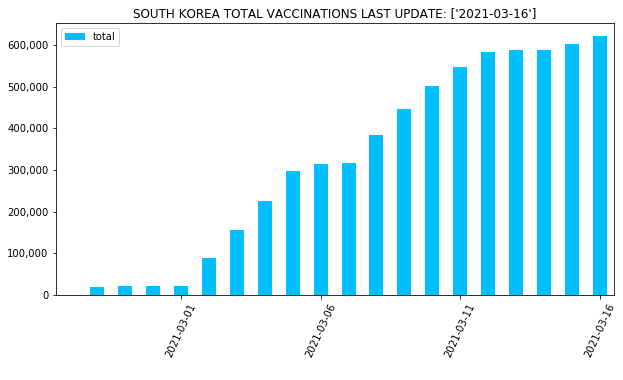

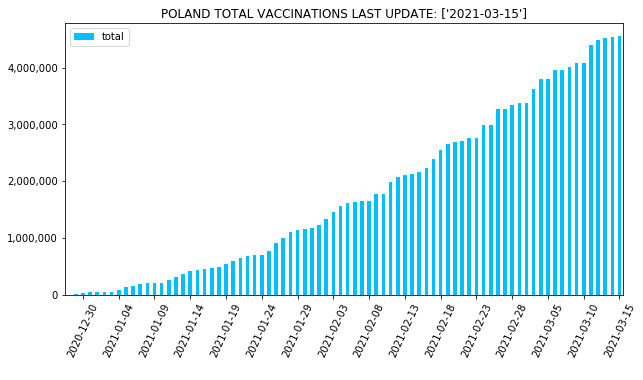

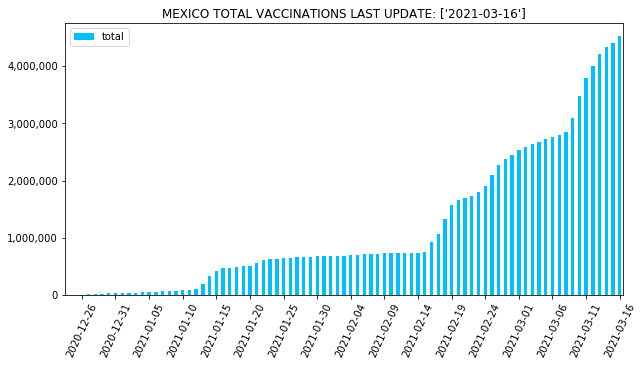

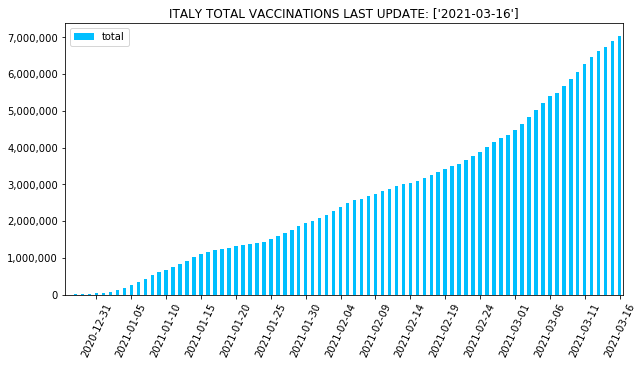

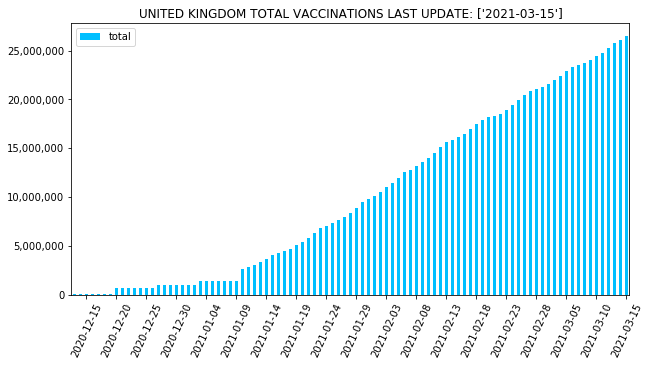

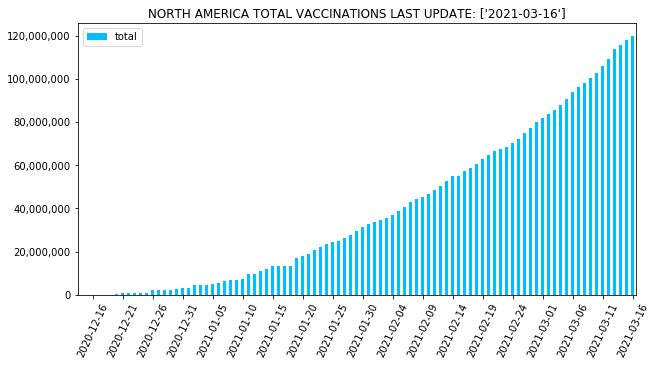

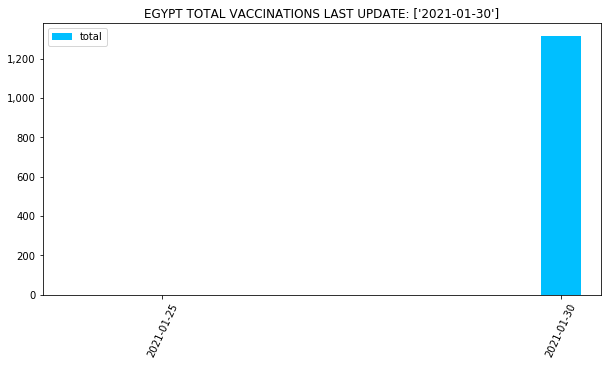

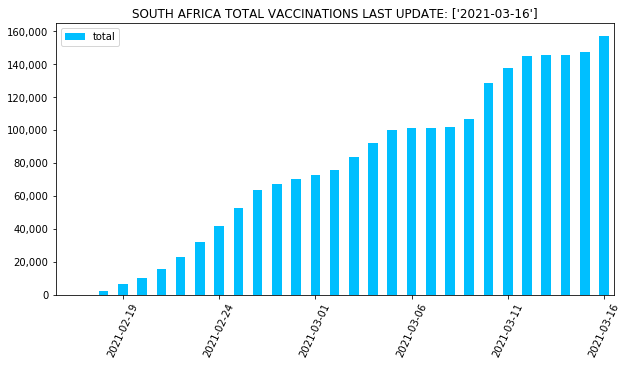

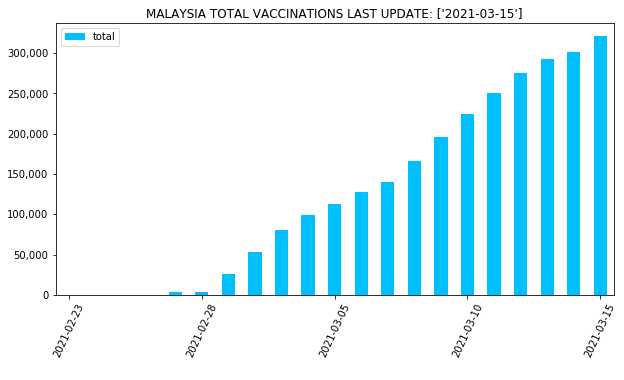

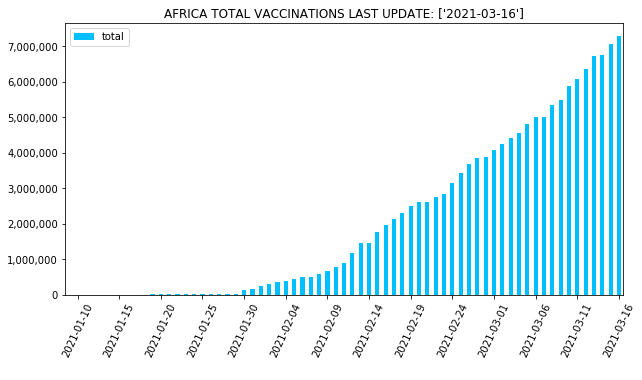

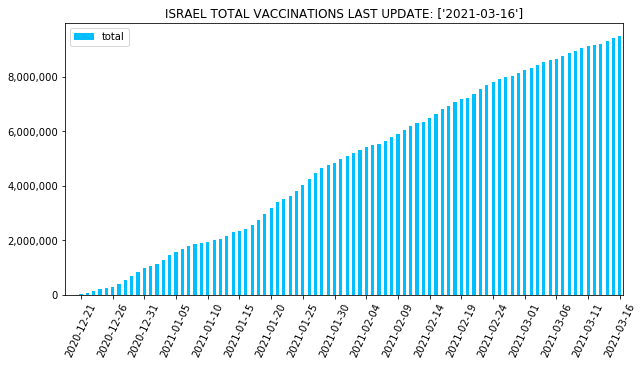

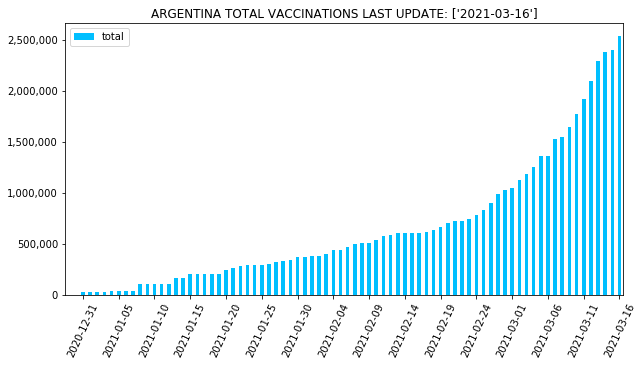

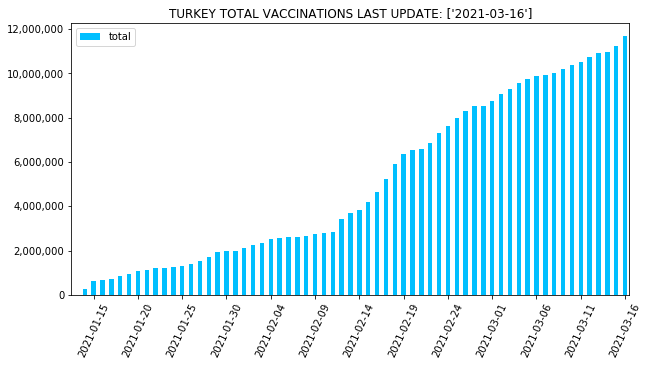

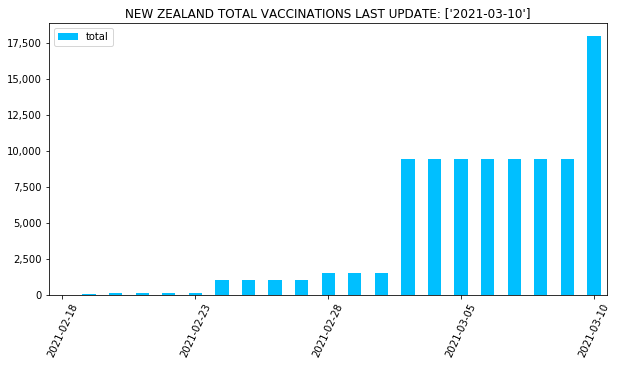

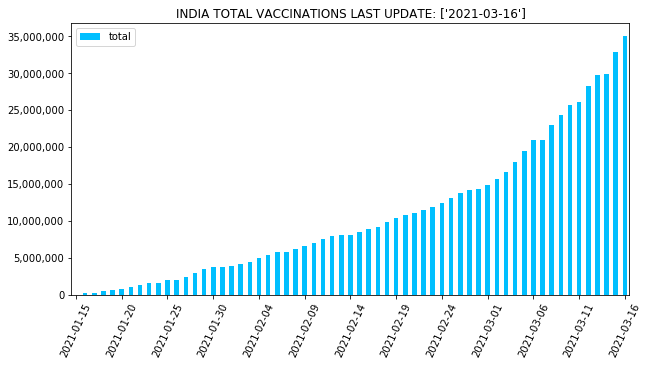

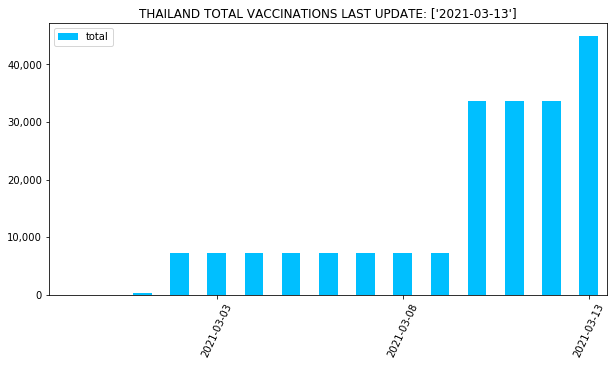

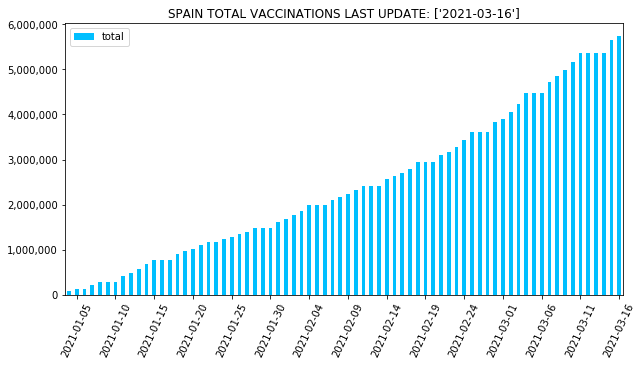

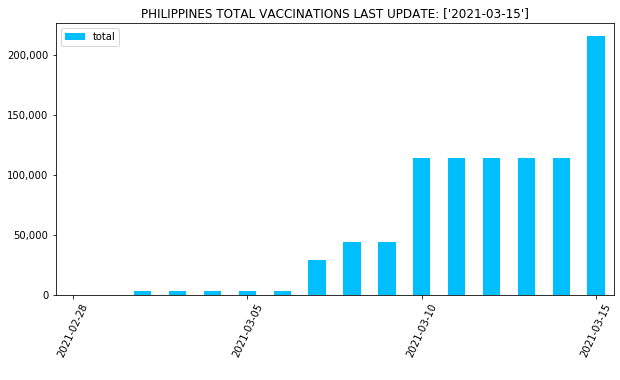

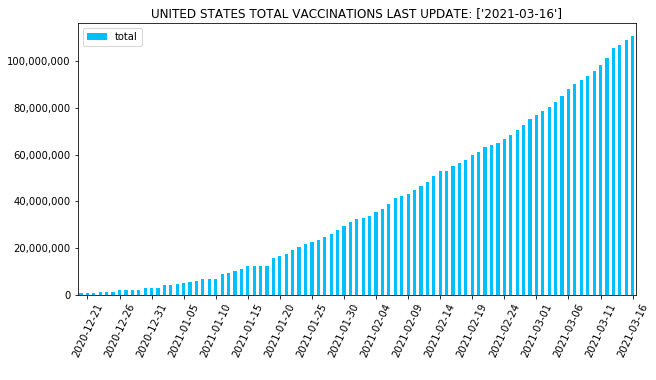

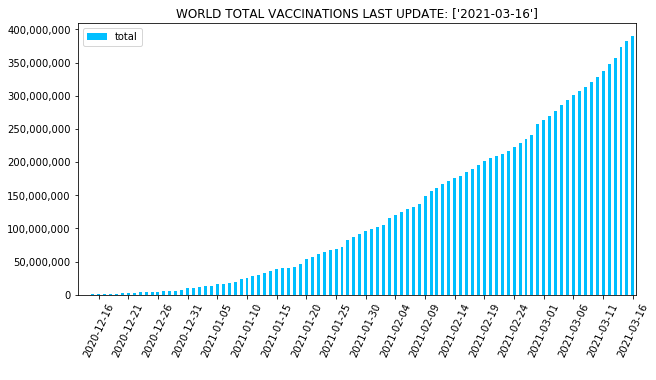

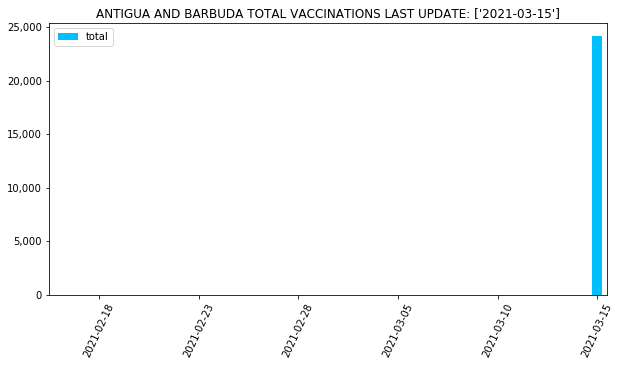

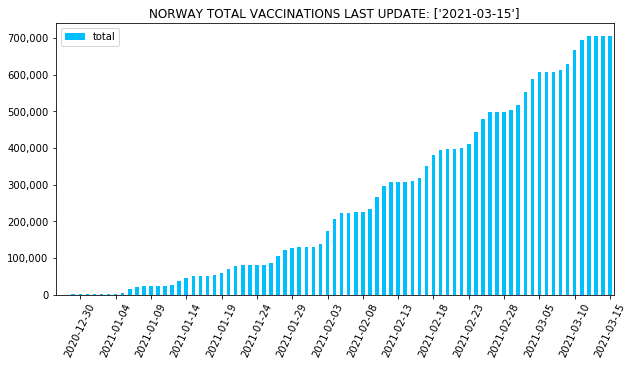

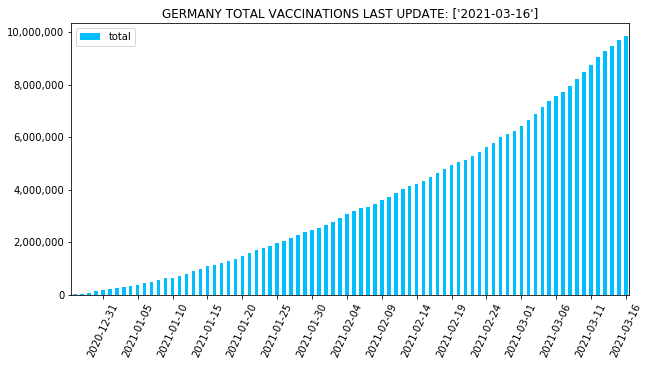

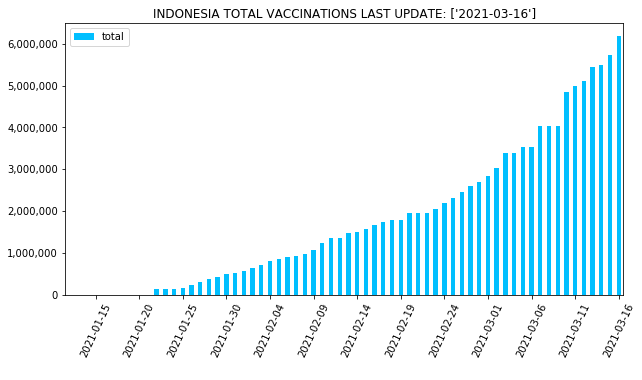

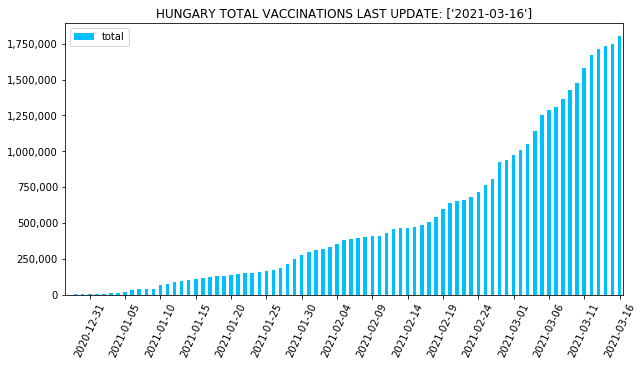

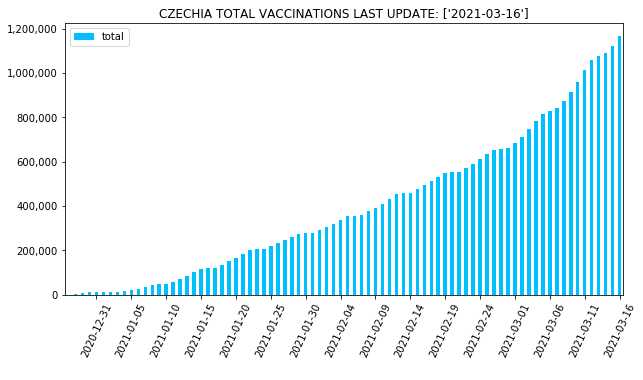

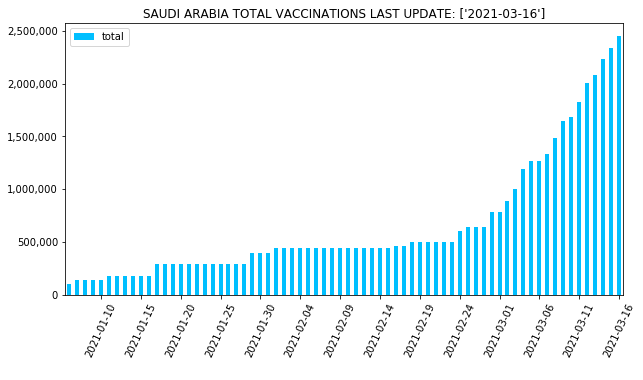

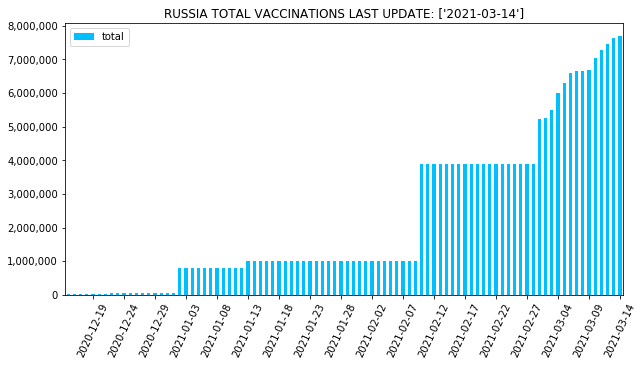

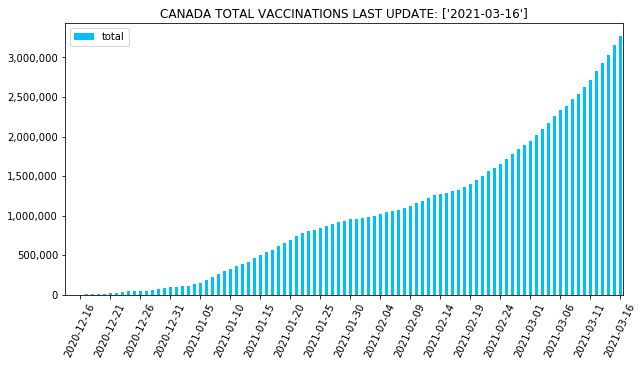

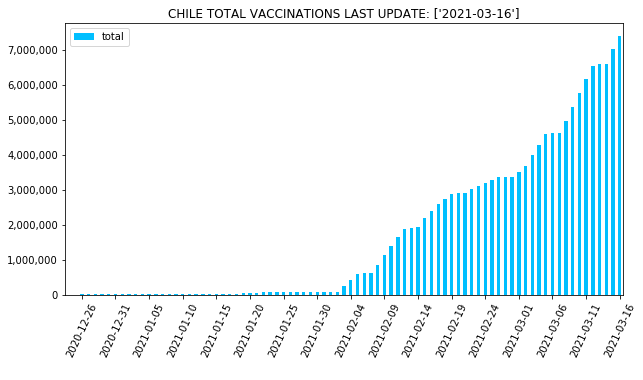

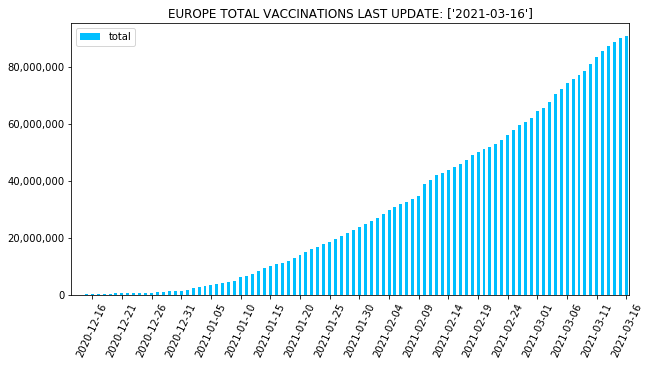

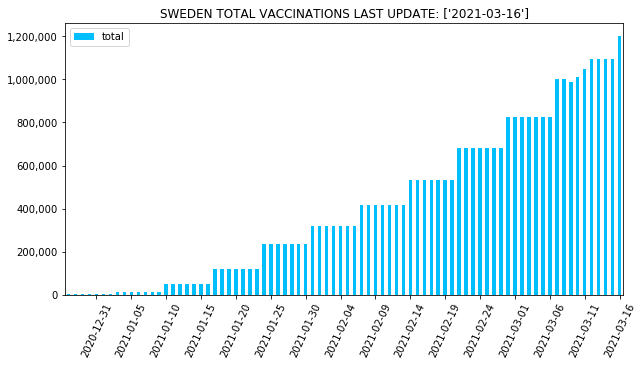

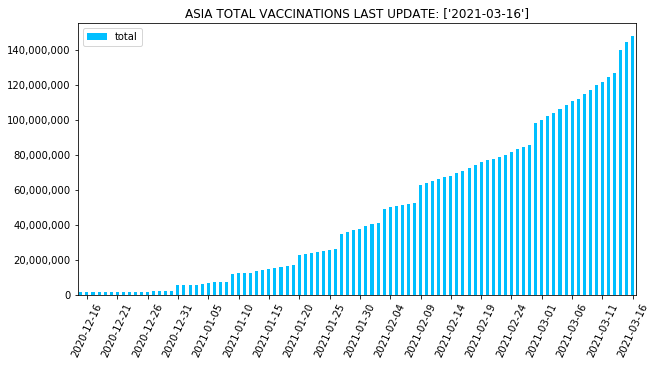

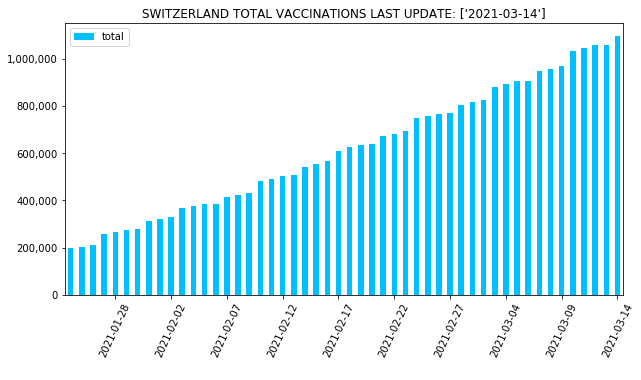

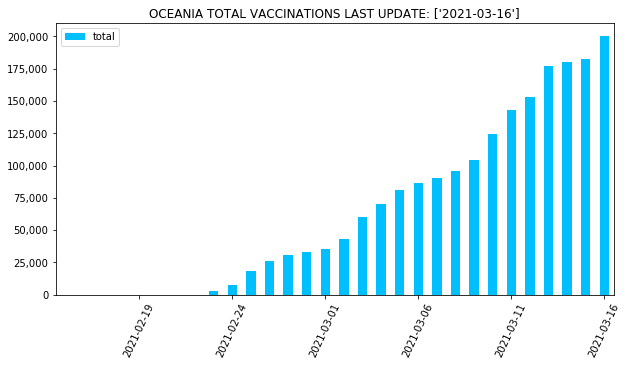

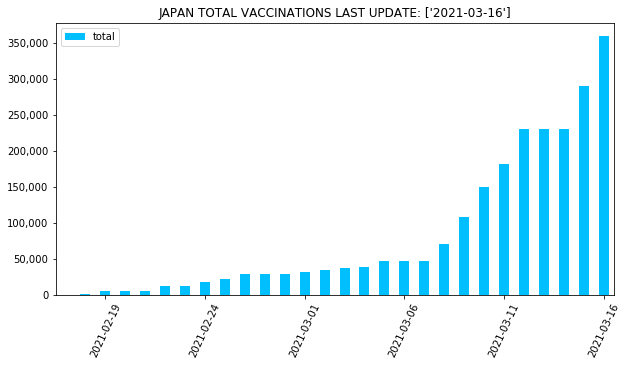

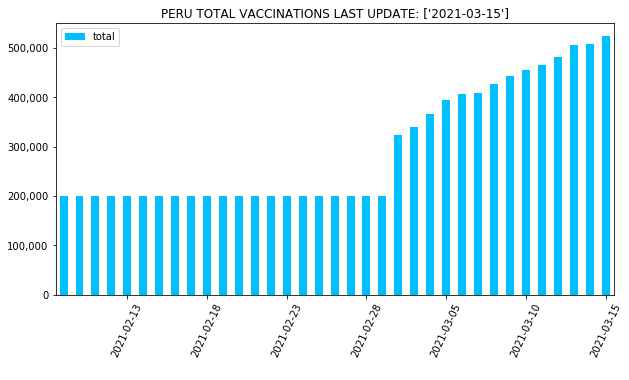

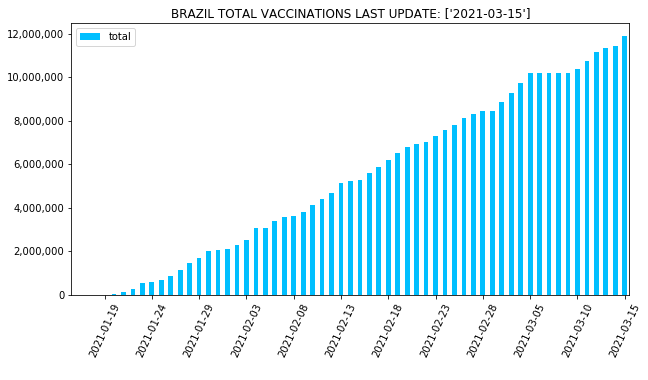

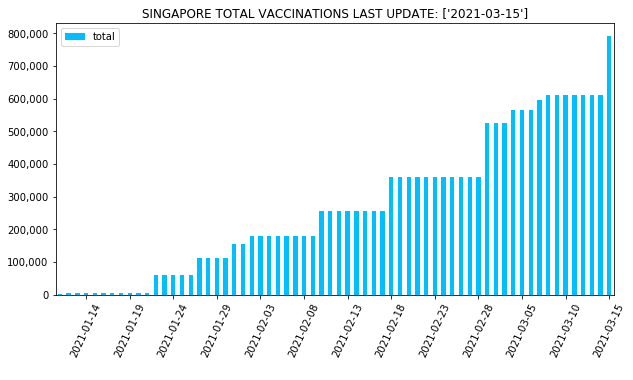

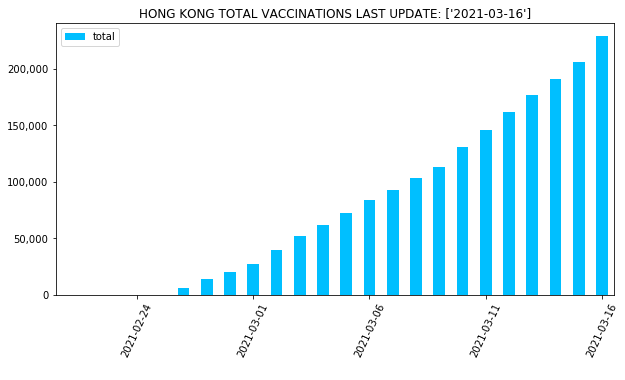

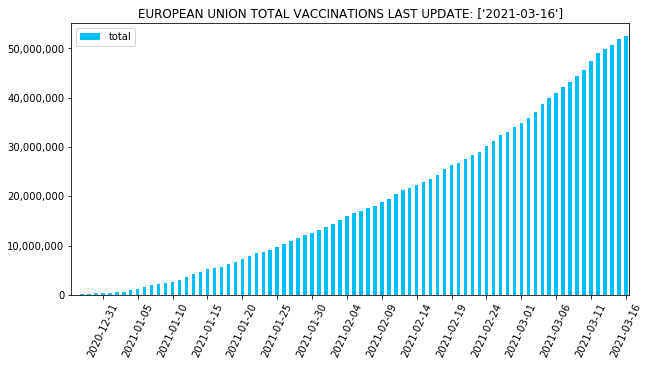

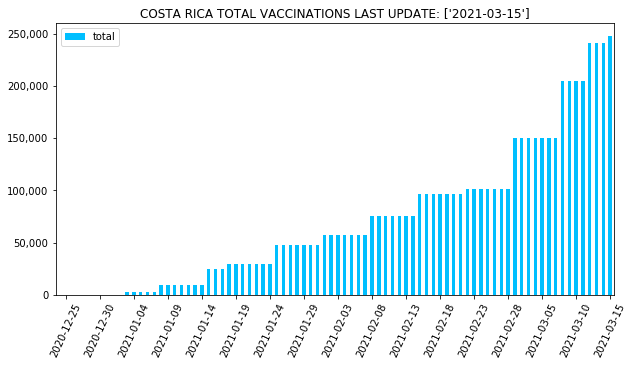

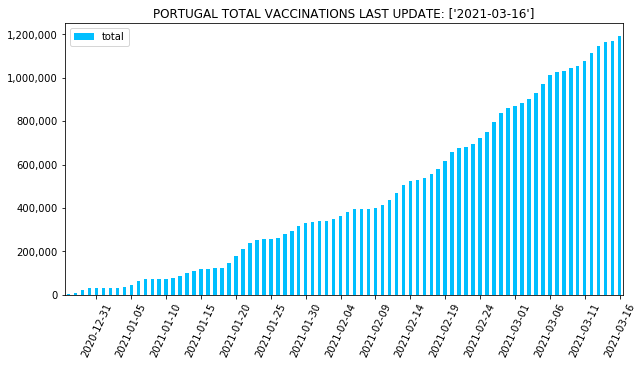

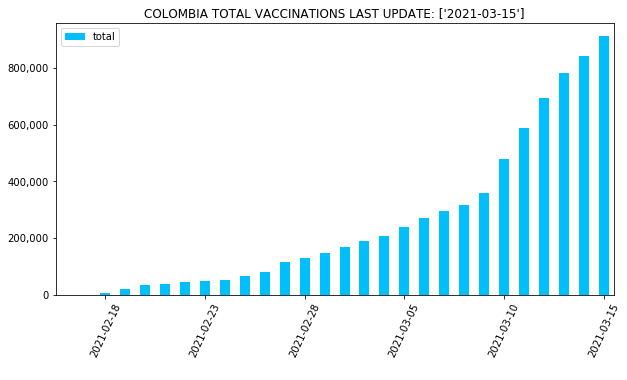

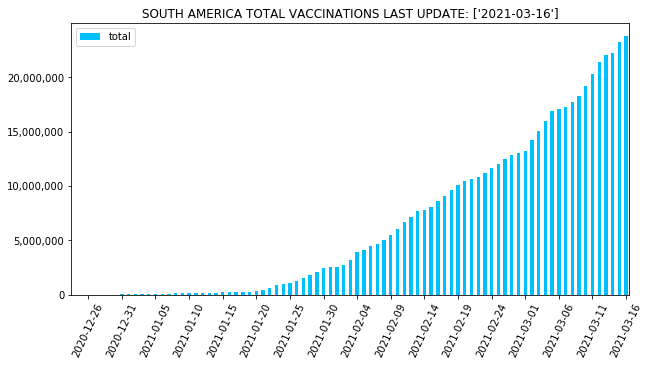

In [34]:
mylist = list(set(df.location))

for item in mylist:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations', label = 'total', color = 'deepskyblue', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' TOTAL VACCINATIONS'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df[df.location == item].date[::-5]));

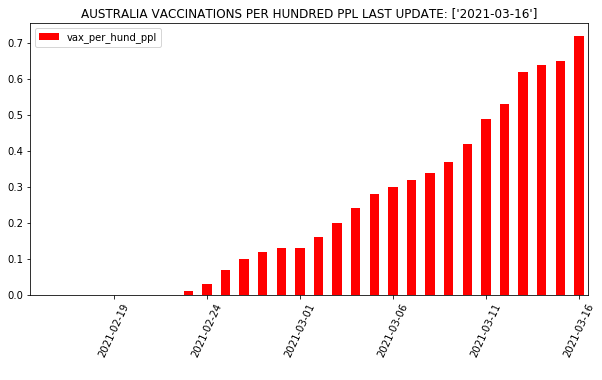

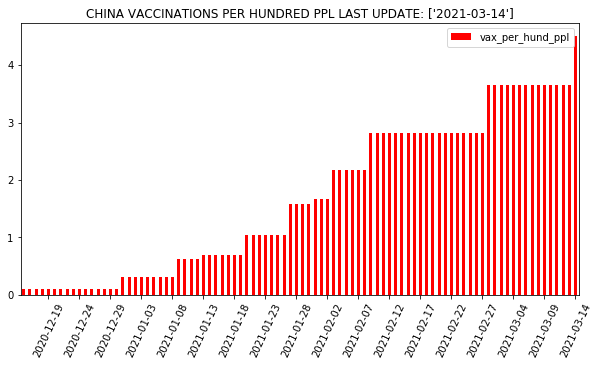

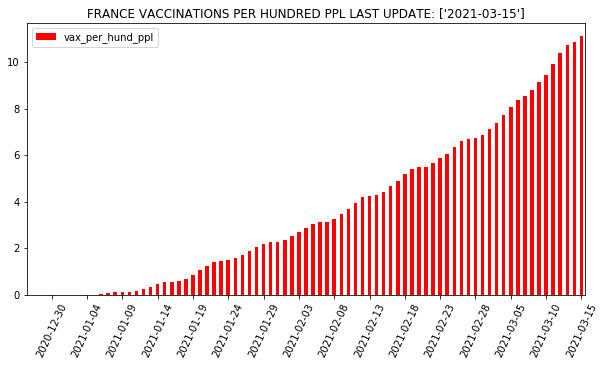

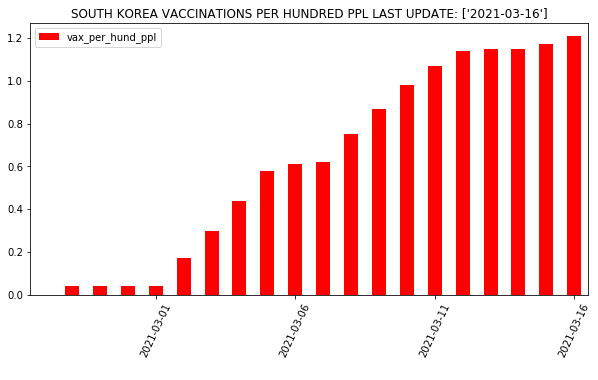

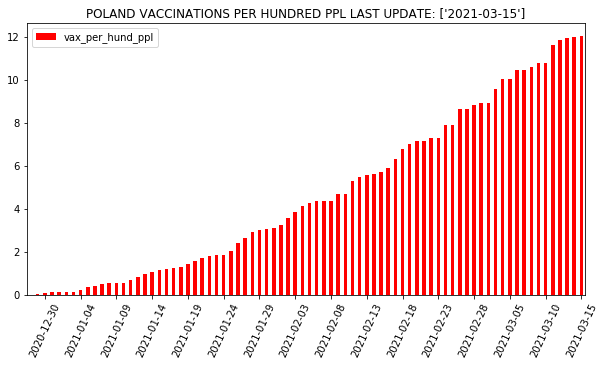

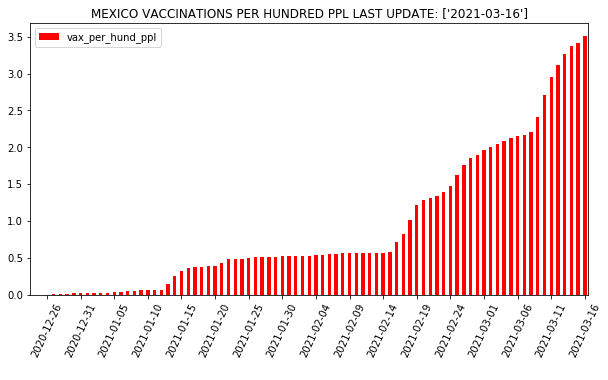

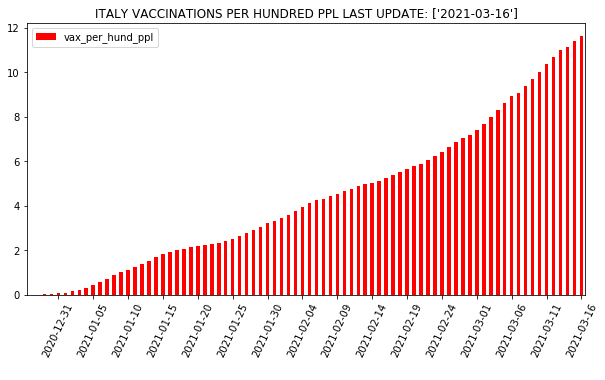

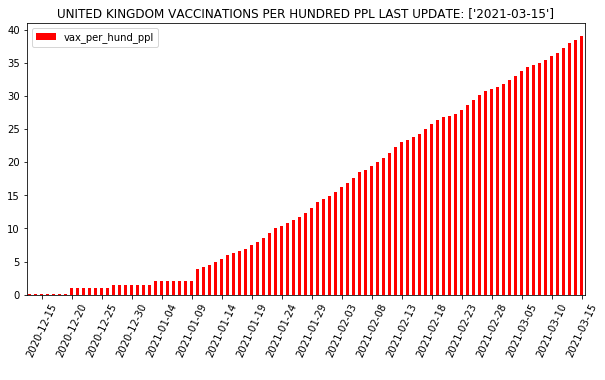

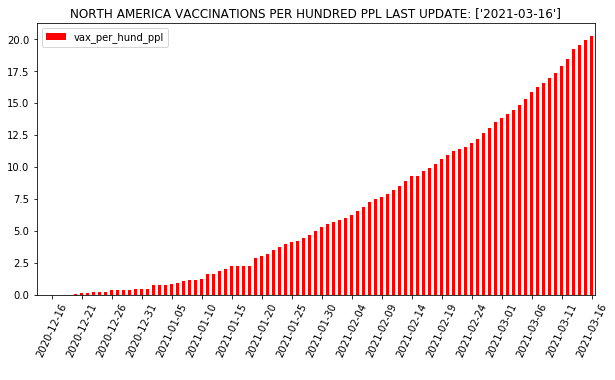

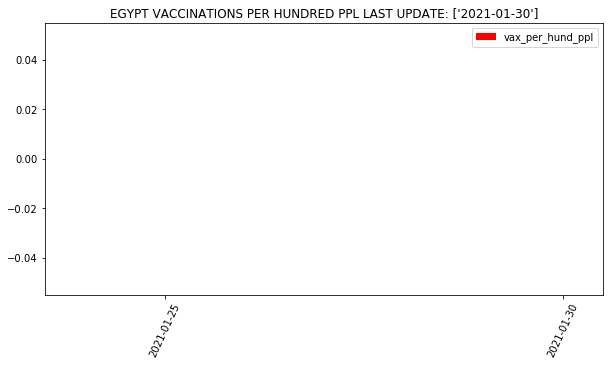

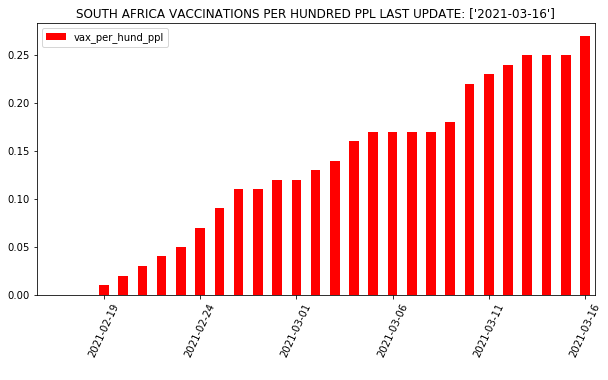

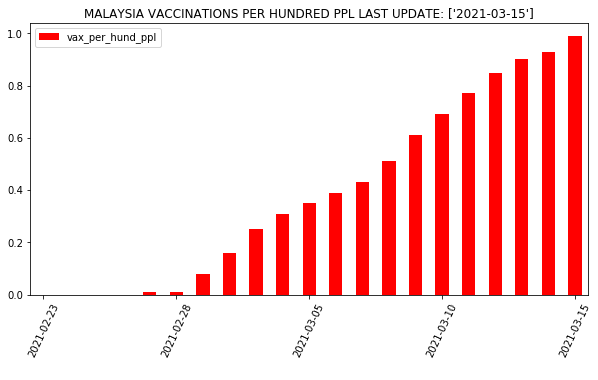

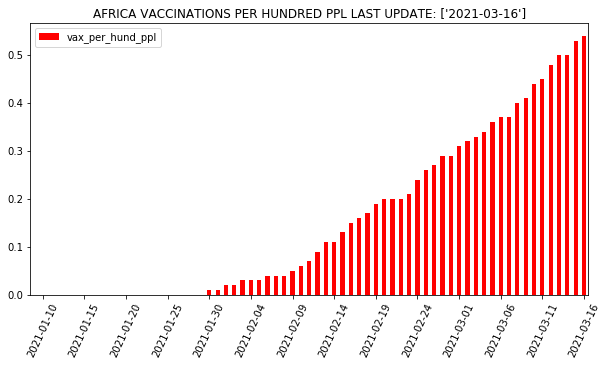

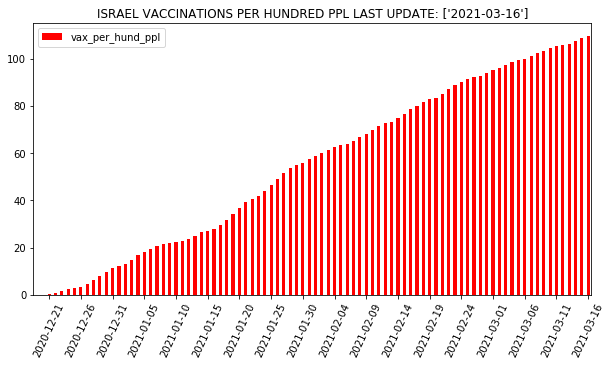

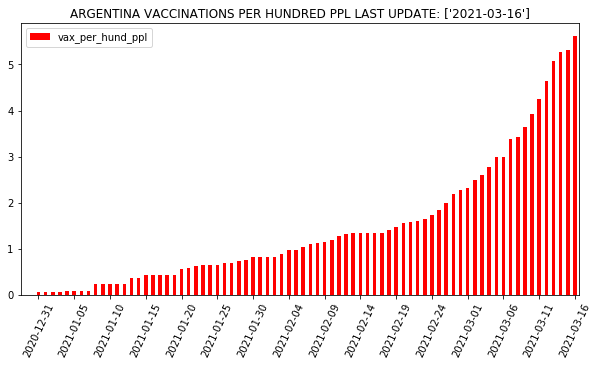

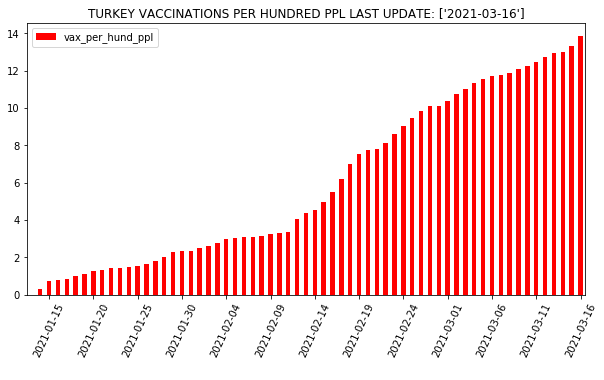

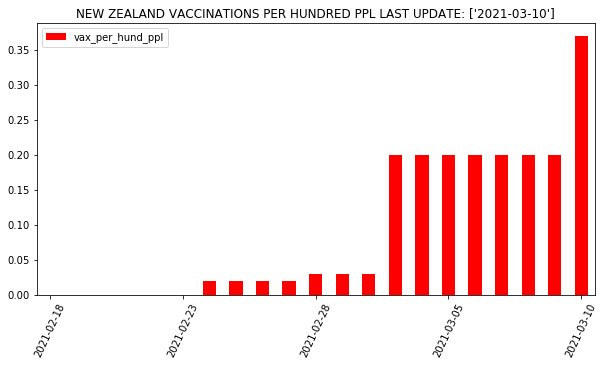

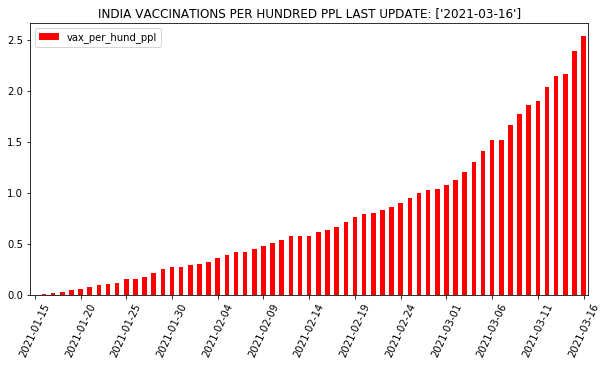

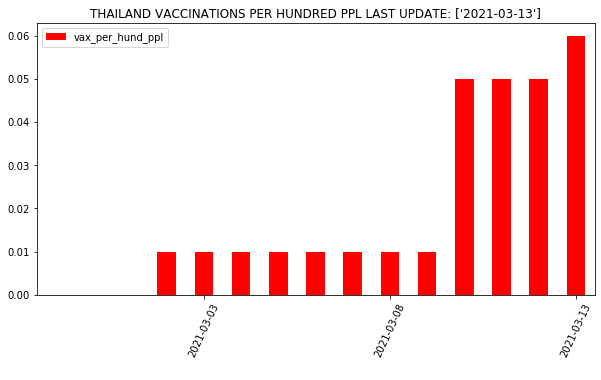

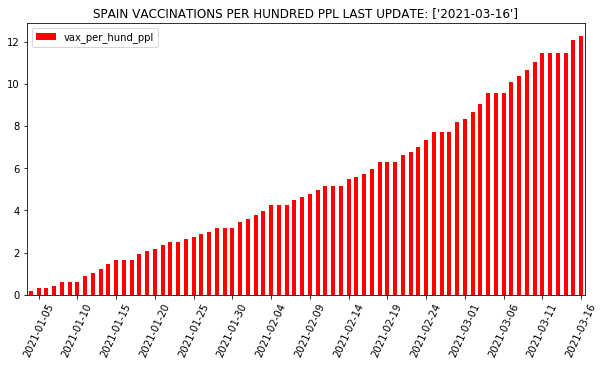

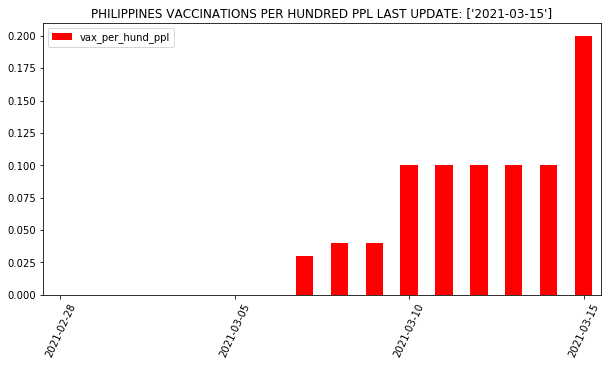

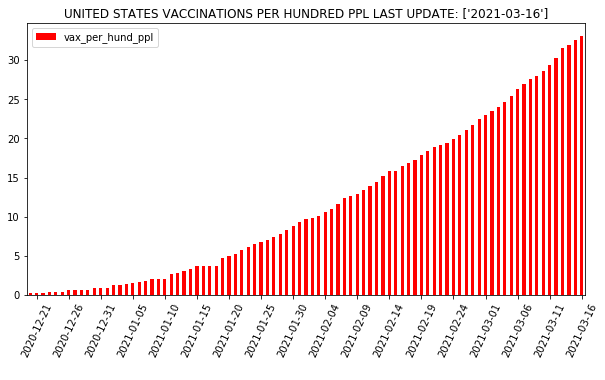

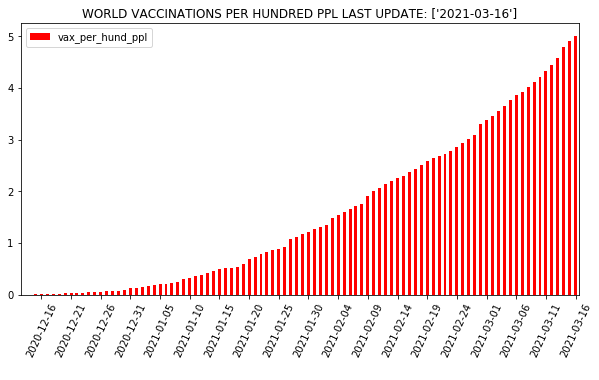

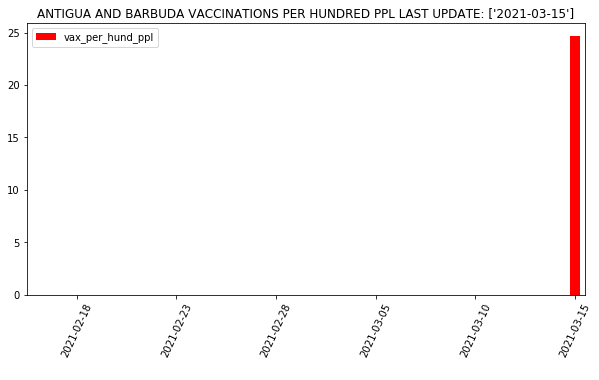

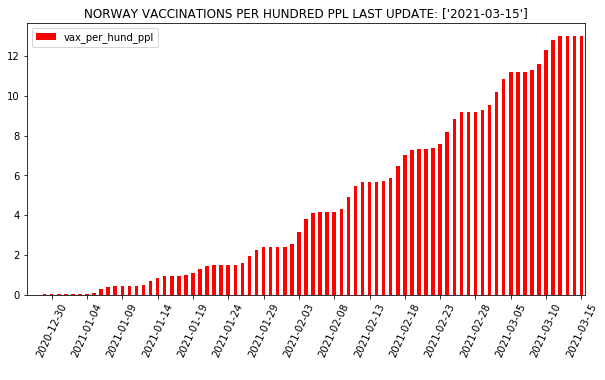

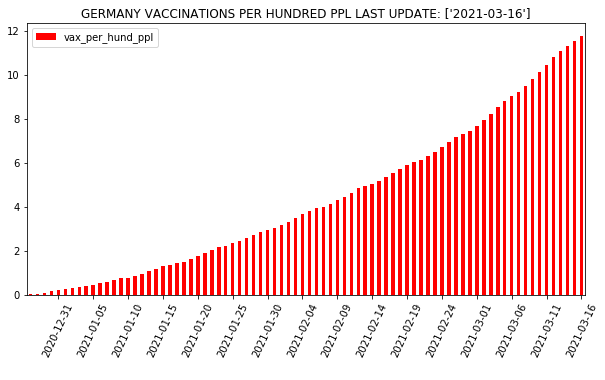

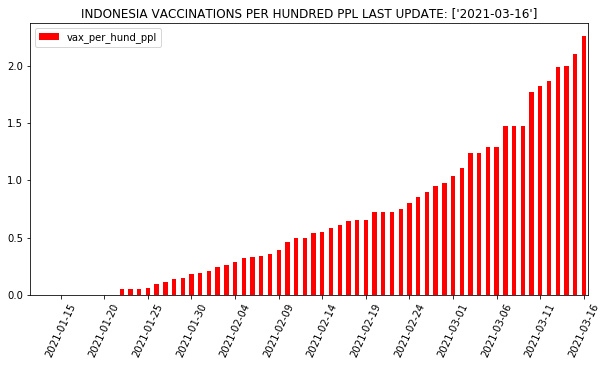

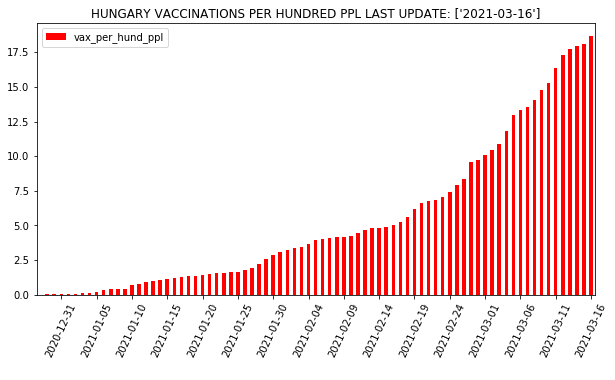

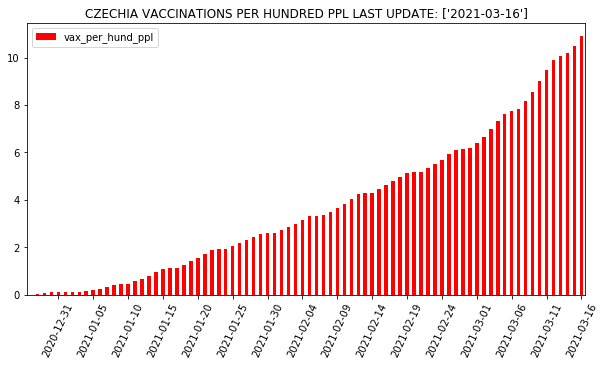

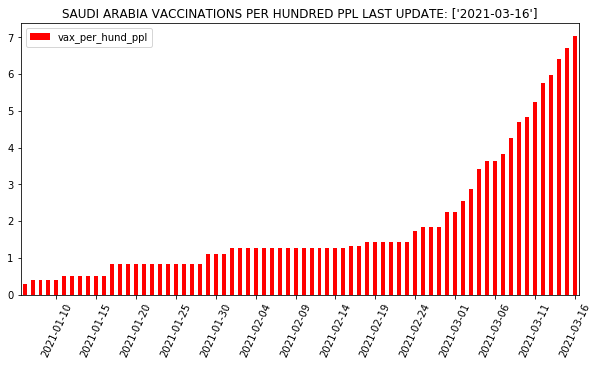

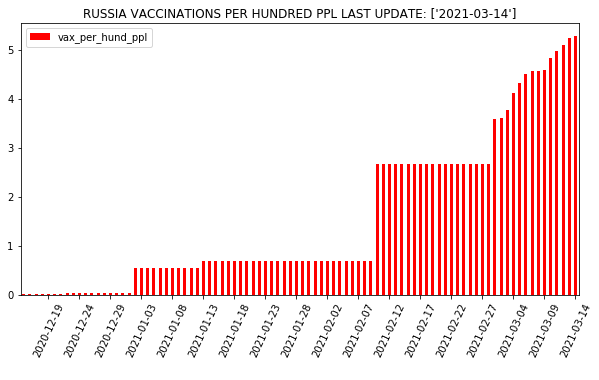

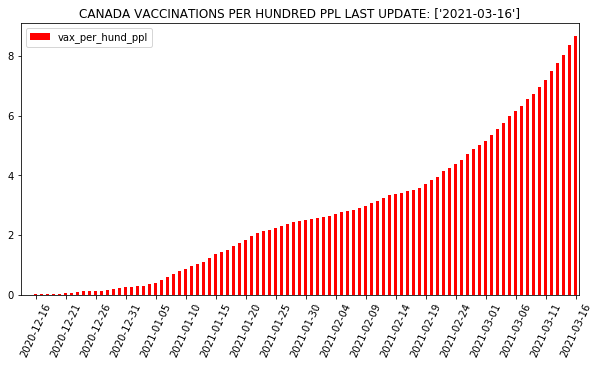

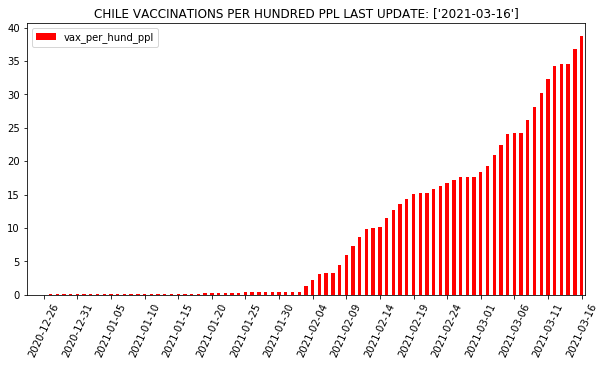

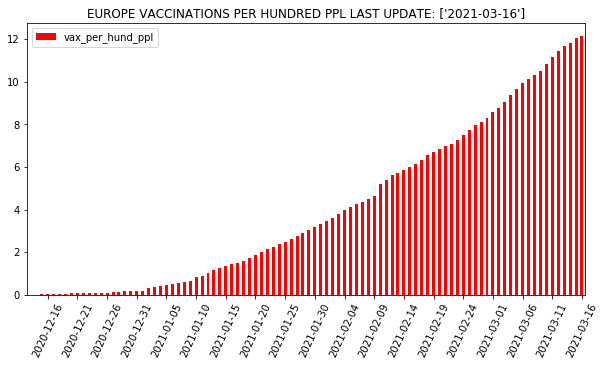

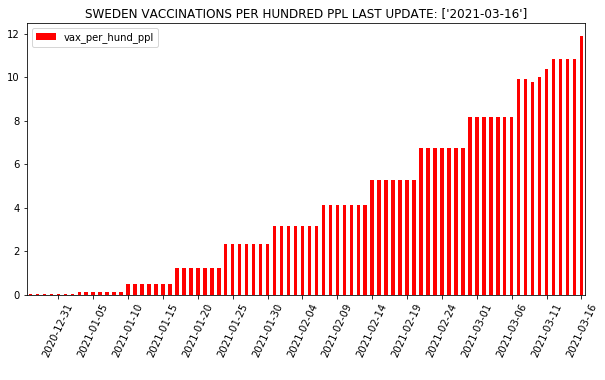

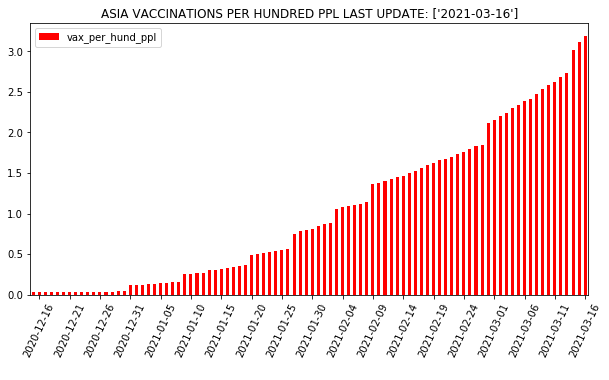

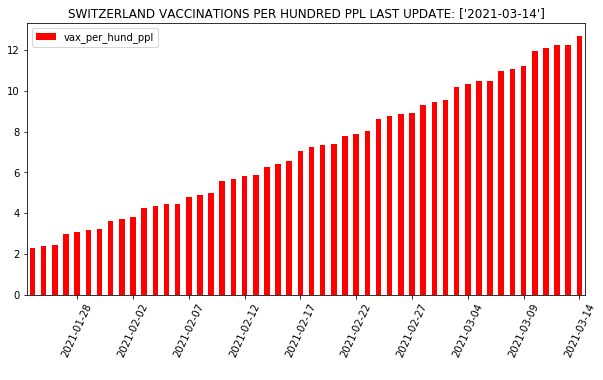

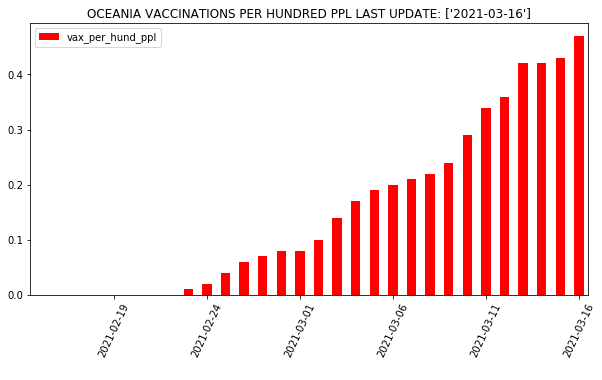

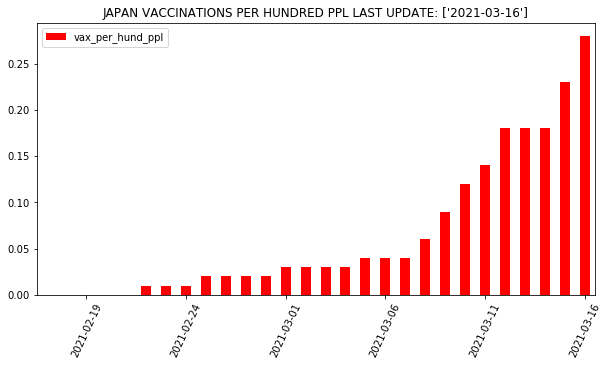

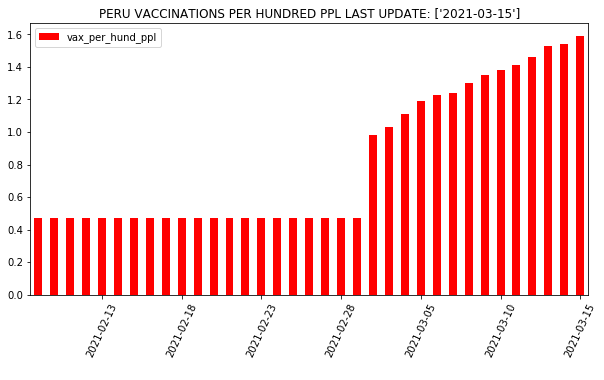

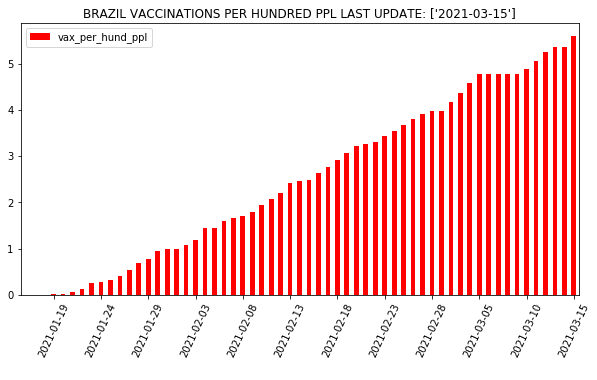

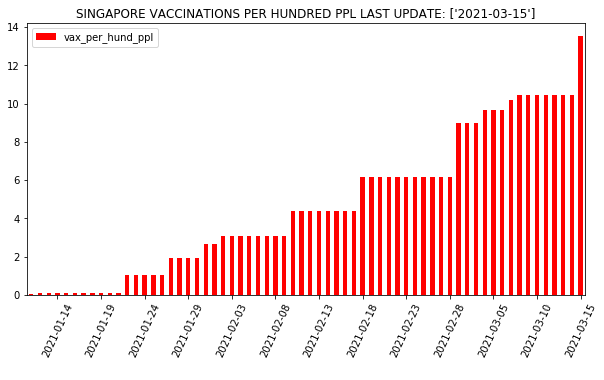

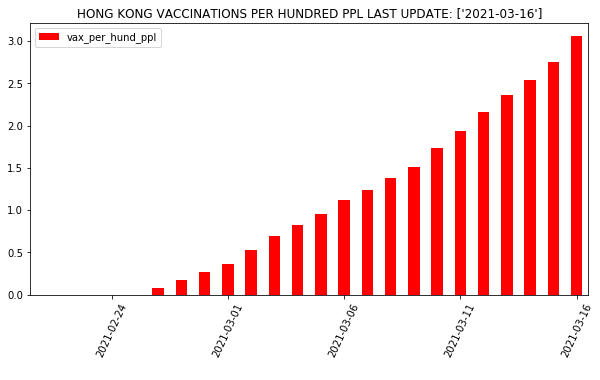

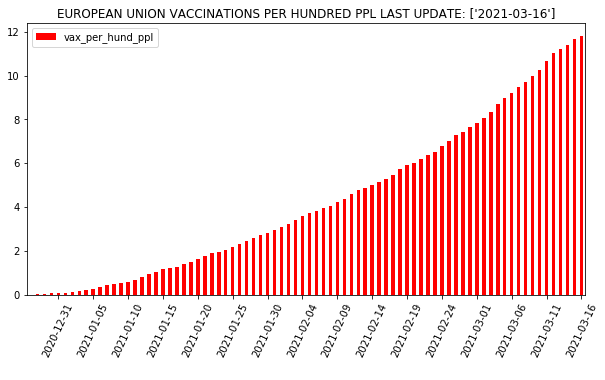

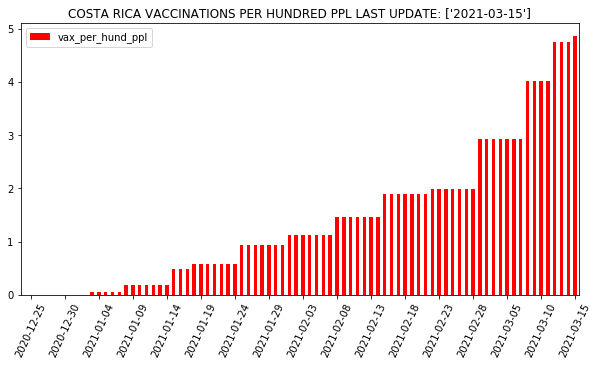

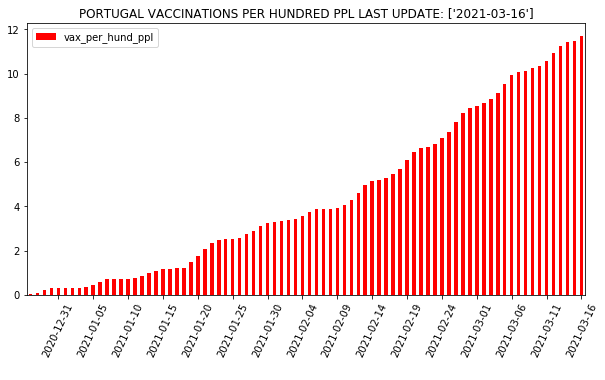

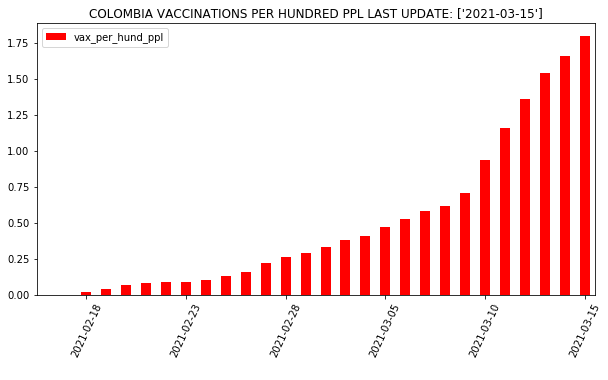

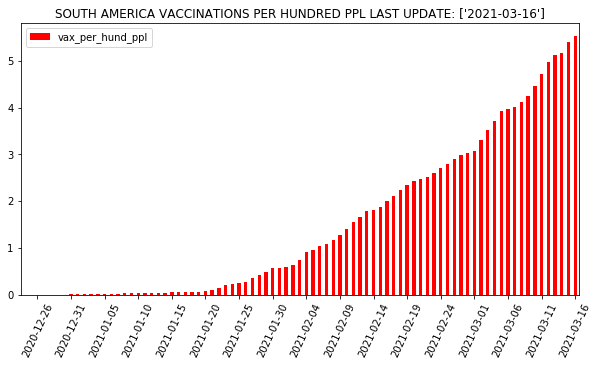

In [35]:
for item in mylist:
    ax = df[df.location == item].plot(kind = 'bar', x = 'date', y = 'total_vaccinations_per_hundred', label = 'vax_per_hund_ppl', color = 'red', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' VACCINATIONS PER HUNDRED PPL'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df[df.location == item].date[::-5]));

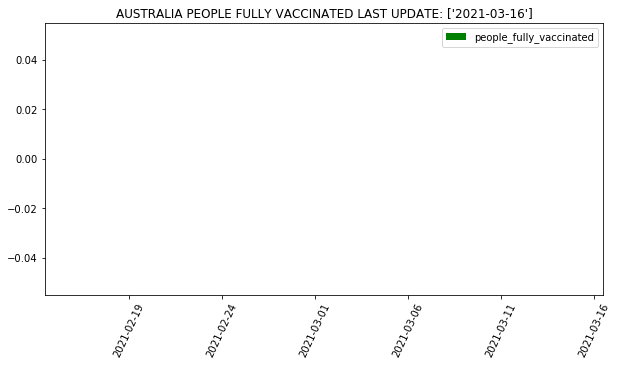

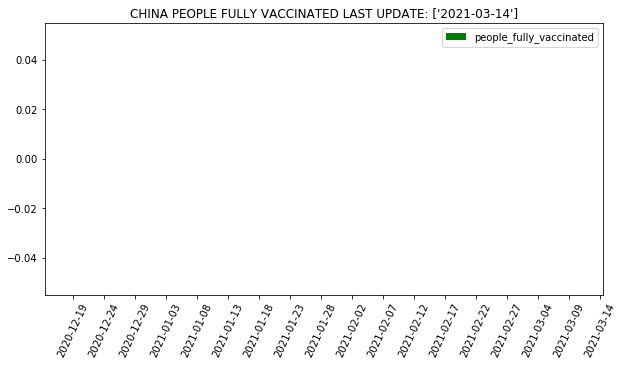

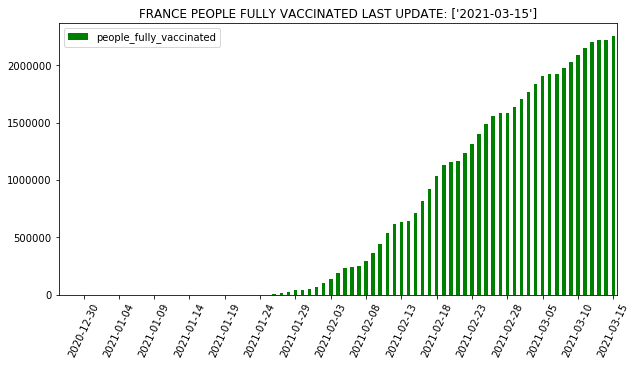

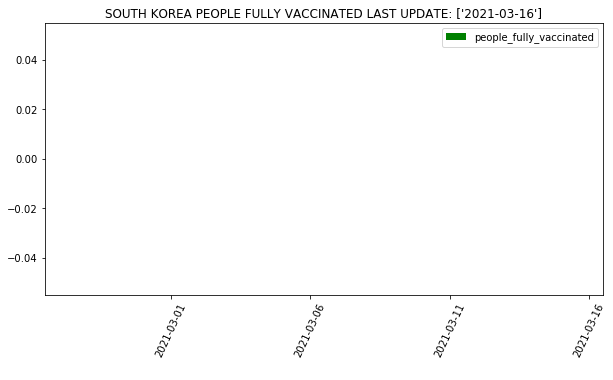

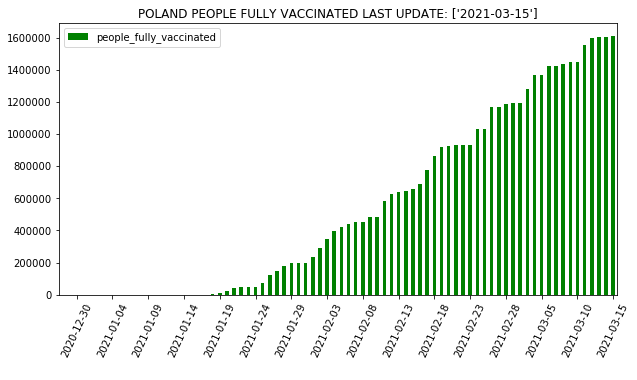

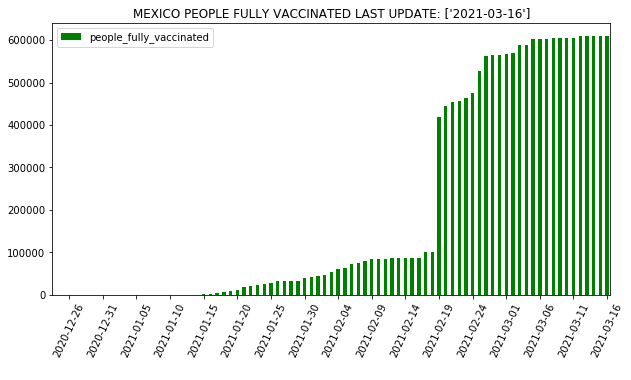

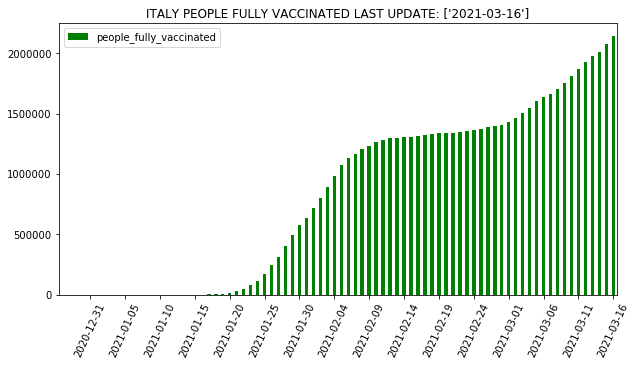

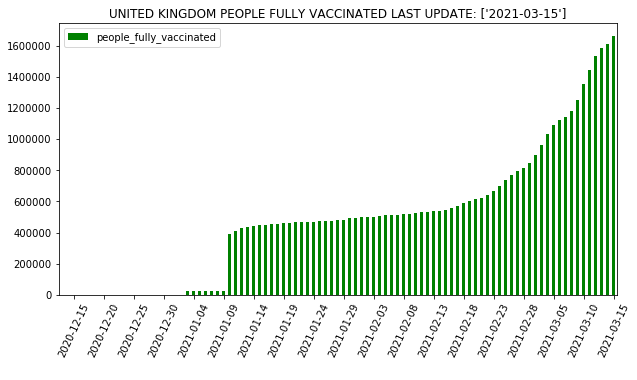

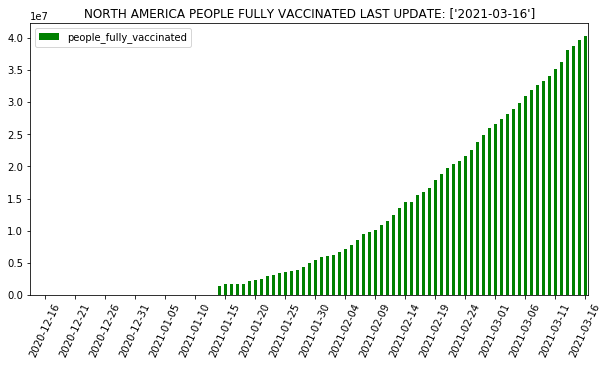

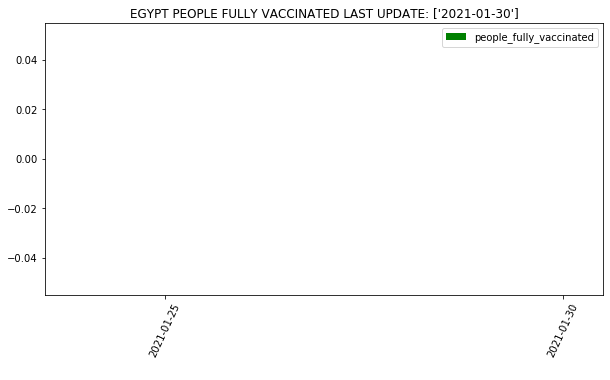

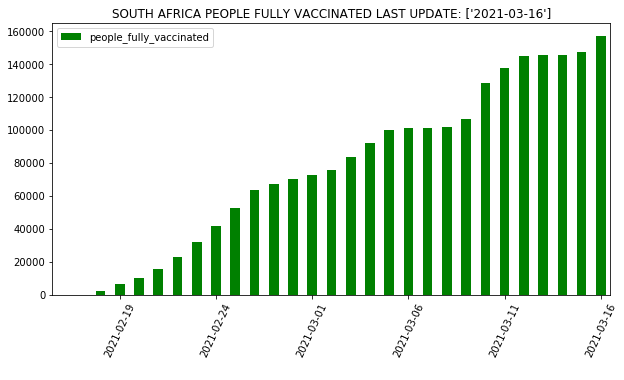

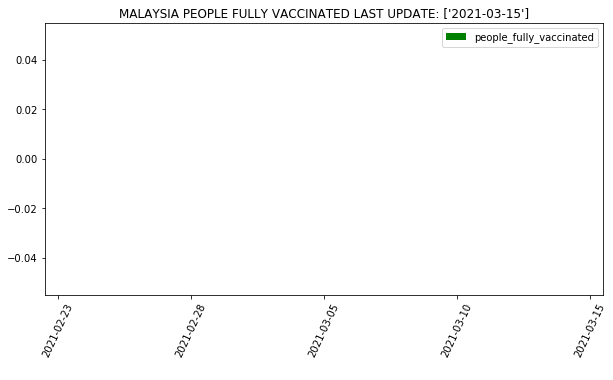

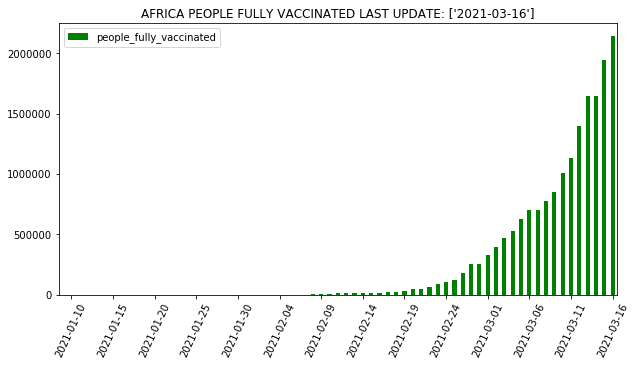

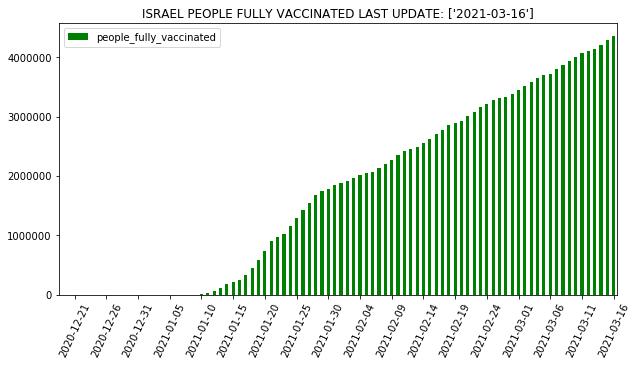

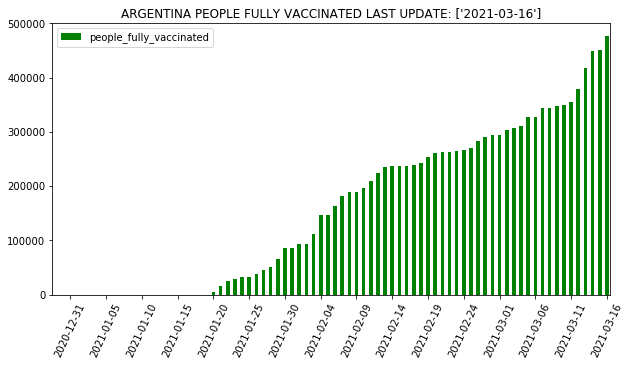

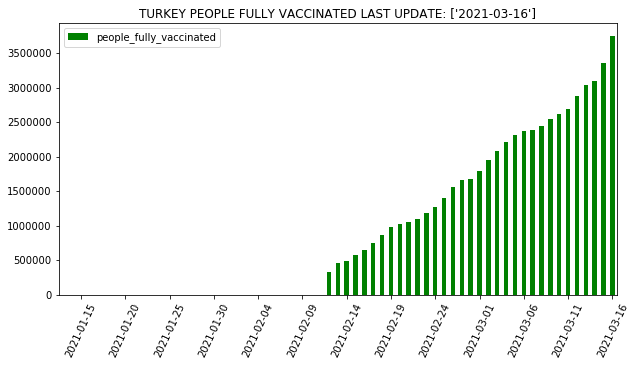

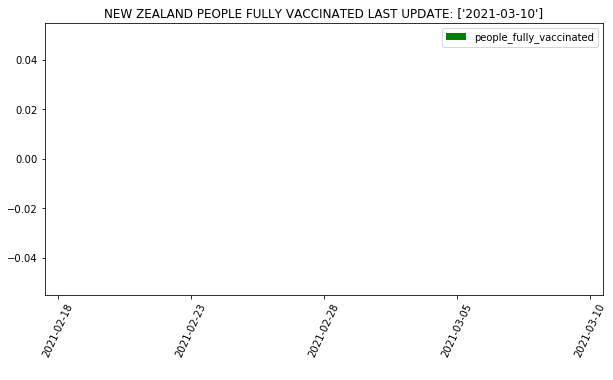

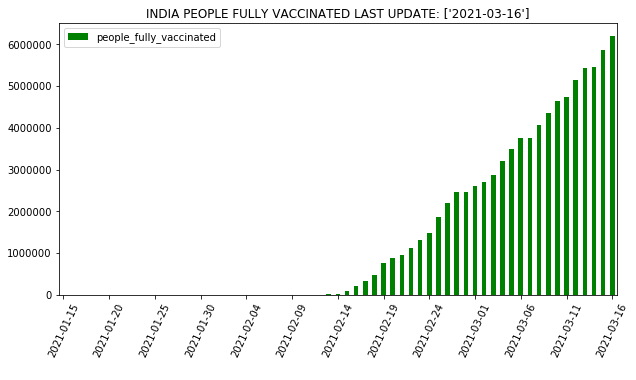

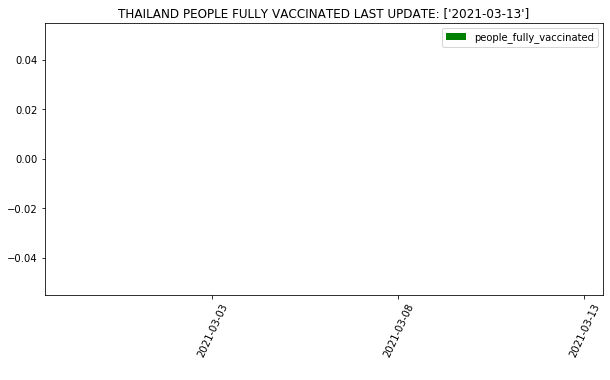

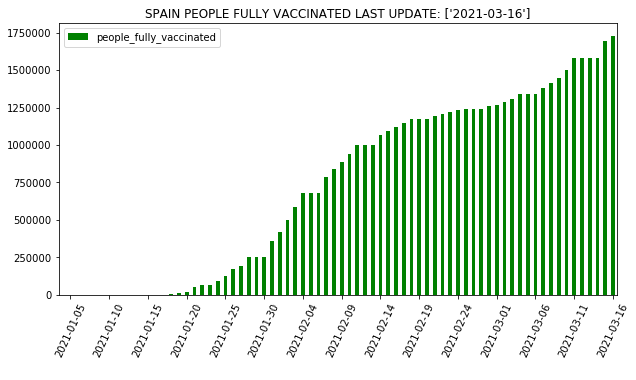

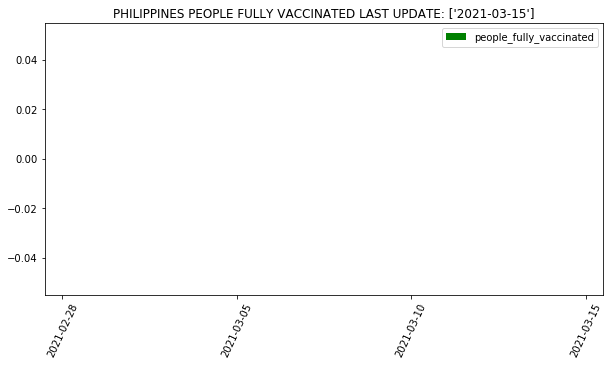

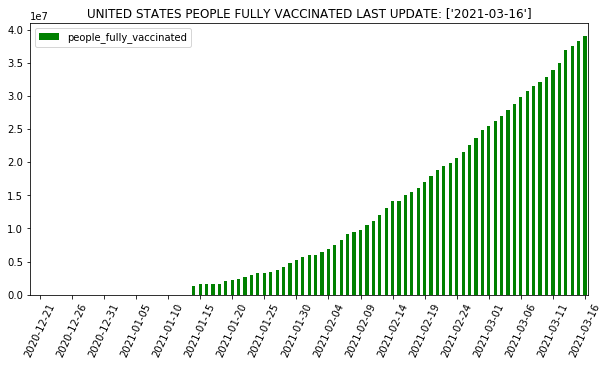

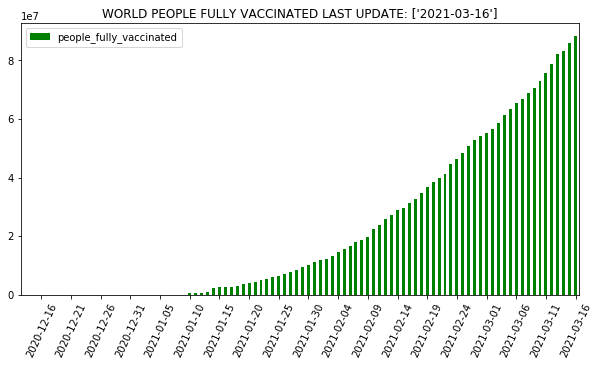

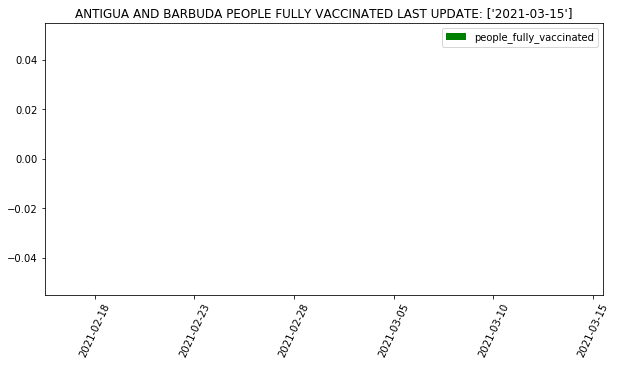

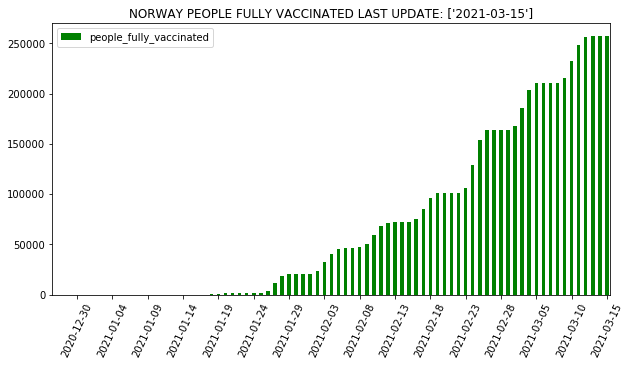

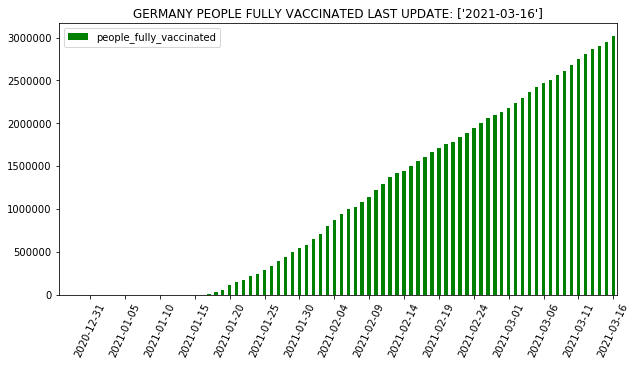

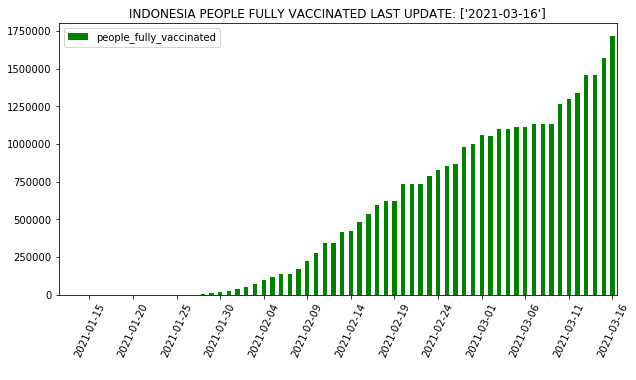

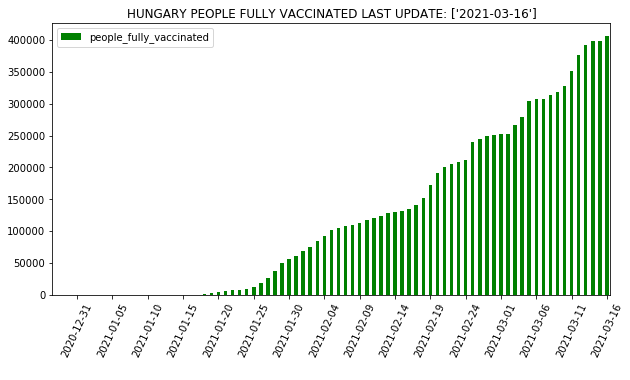

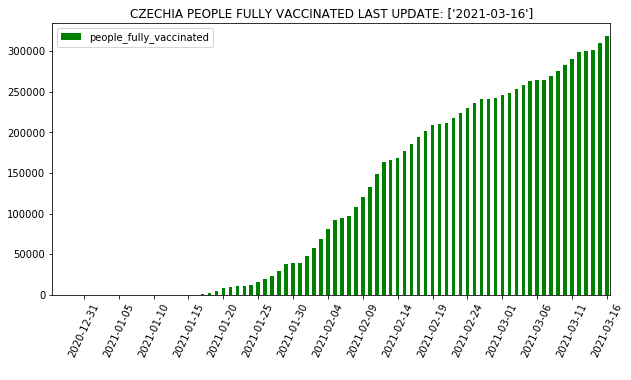

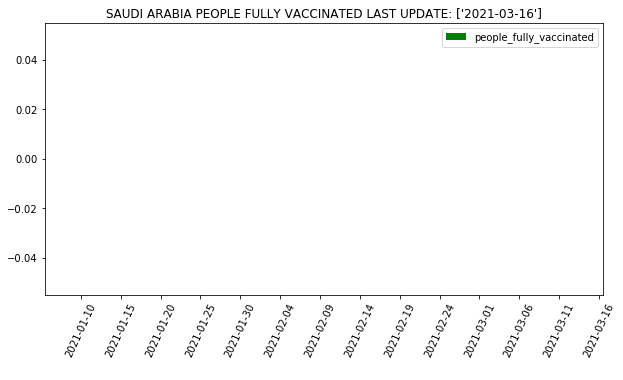

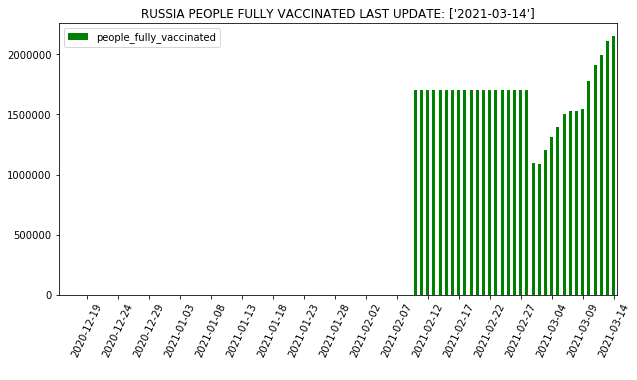

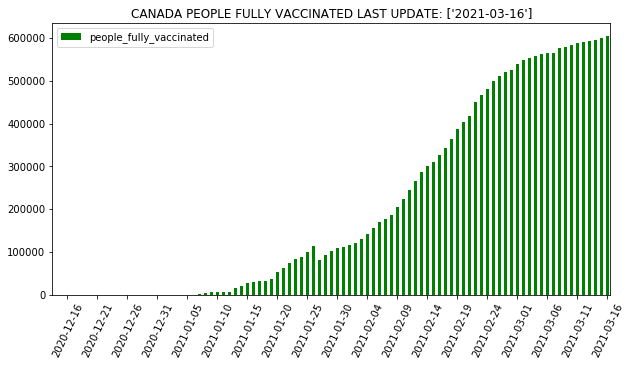

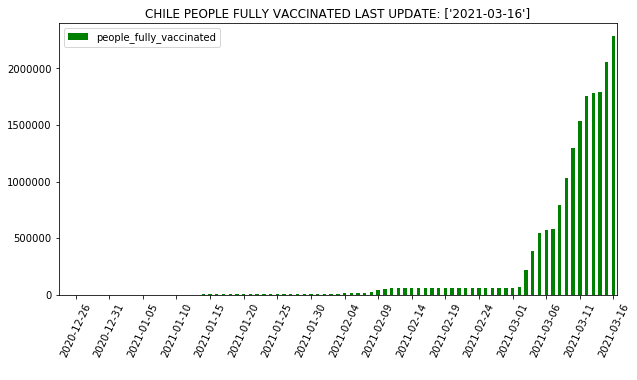

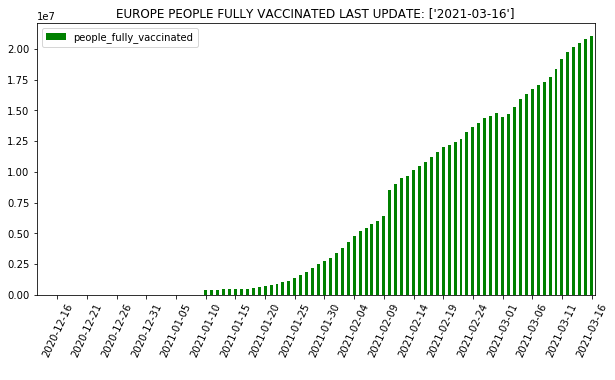

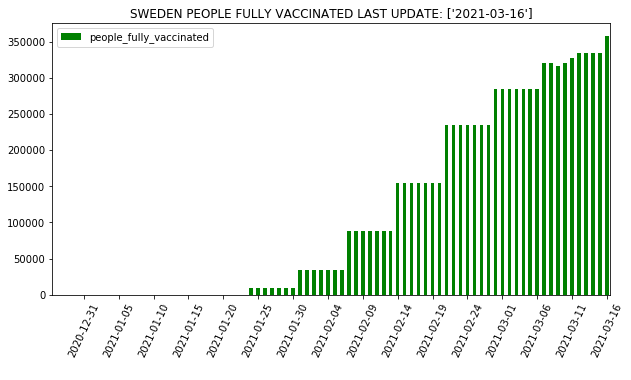

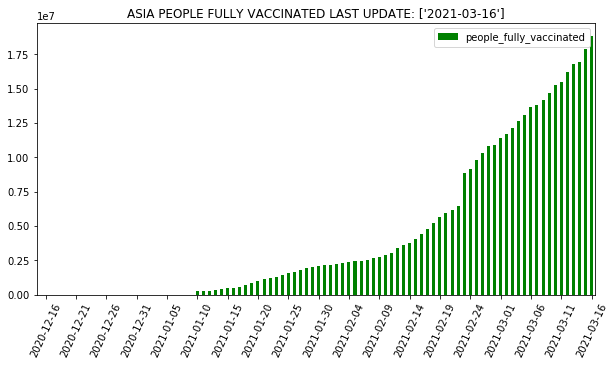

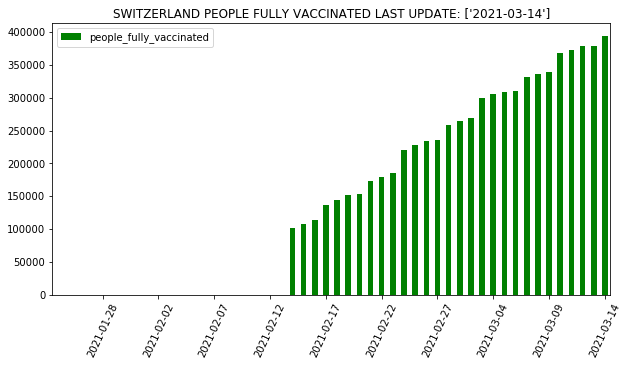

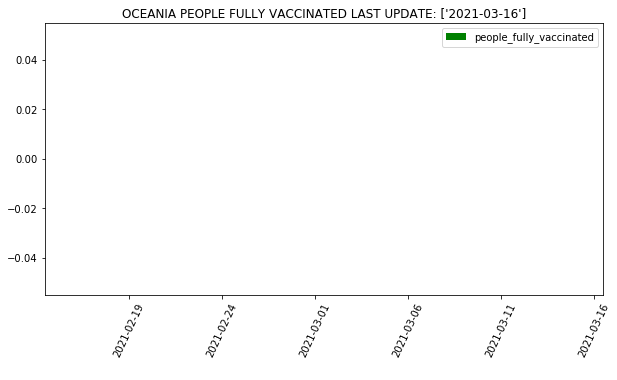

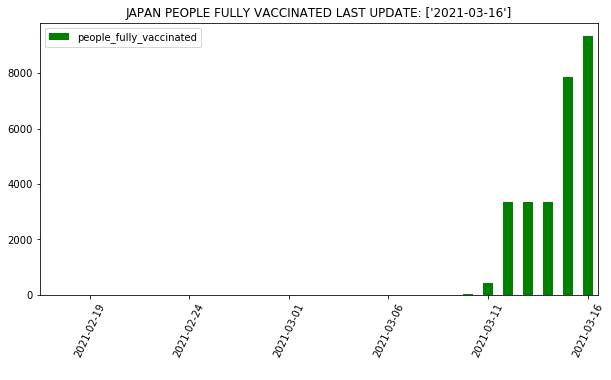

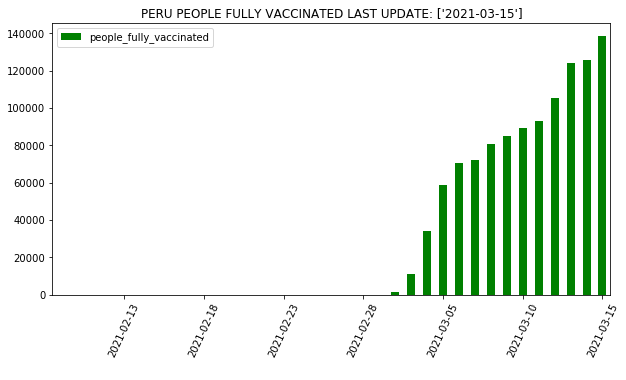

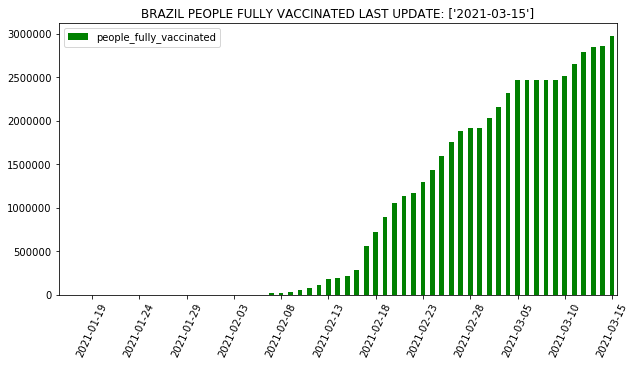

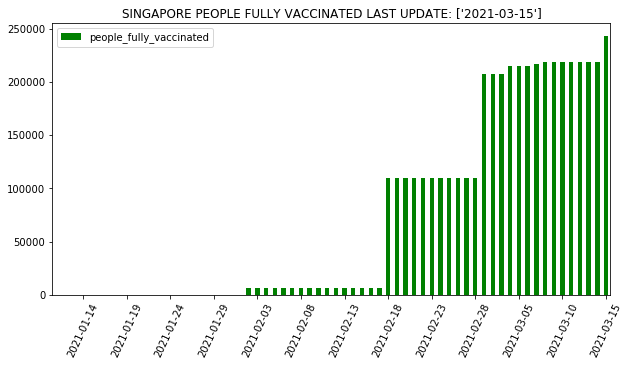

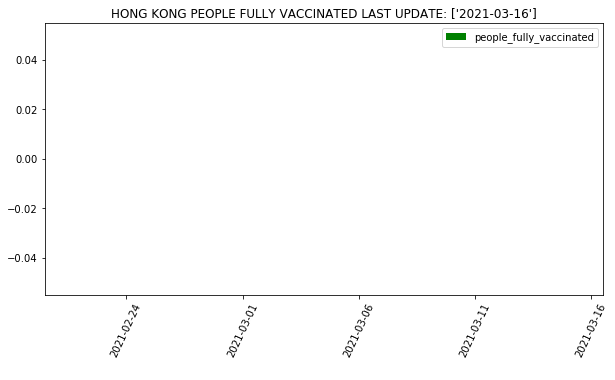

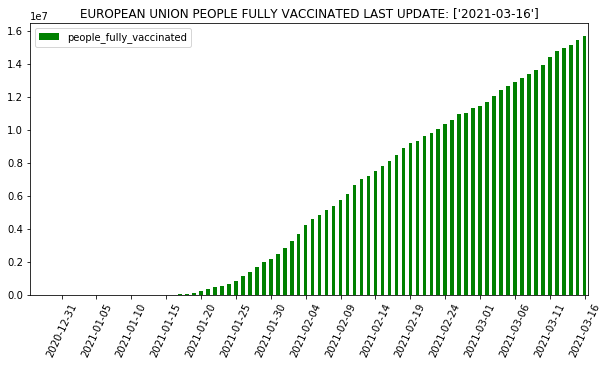

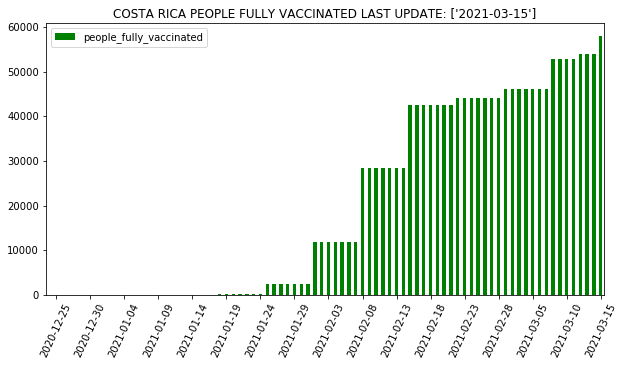

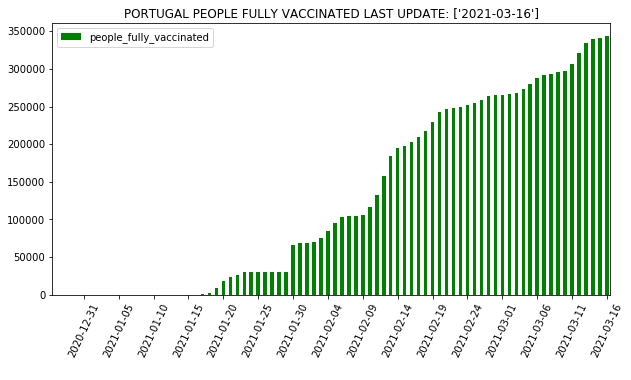

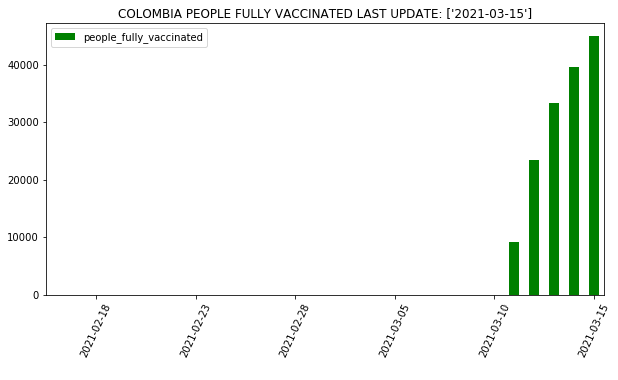

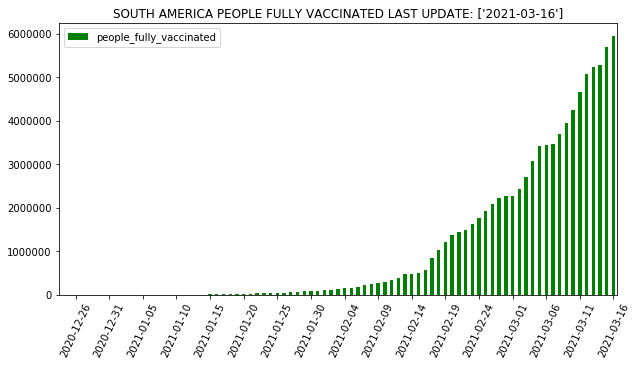

In [36]:
for item in mylist:
    ax = df_full[df_full.location == item].plot(kind = 'bar', x = 'date', y = 'people_fully_vaccinated', label = 'people_fully_vaccinated', color = 'green', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' PEOPLE FULLY VACCINATED'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df_full[df_full.location == item].date[::-5]));

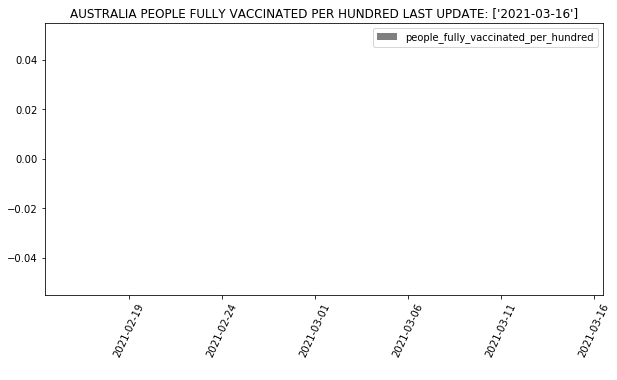

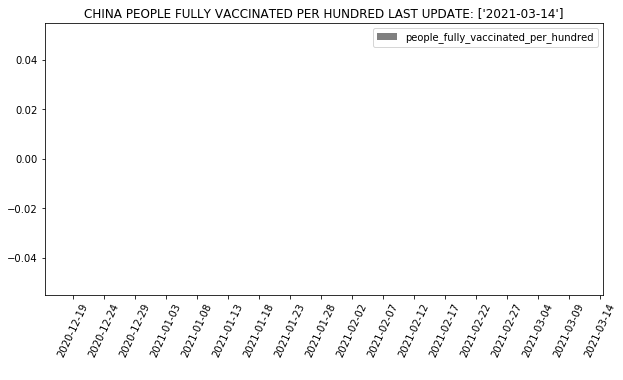

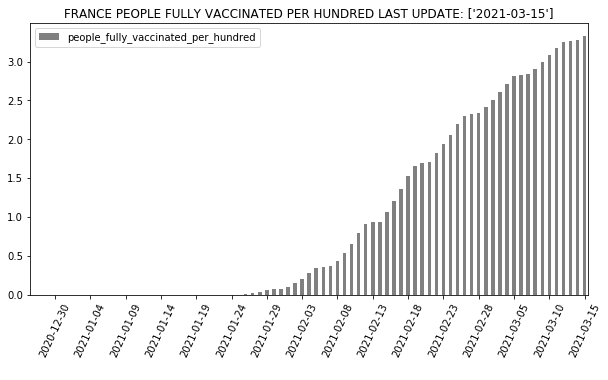

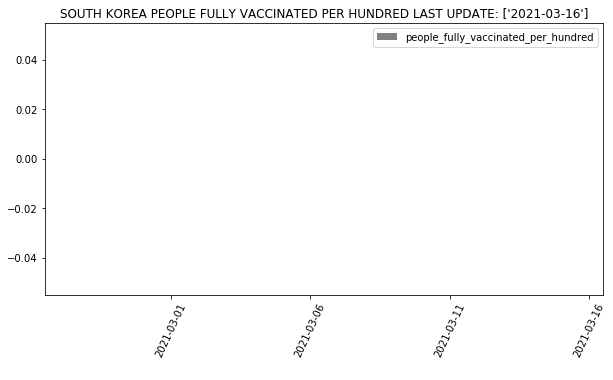

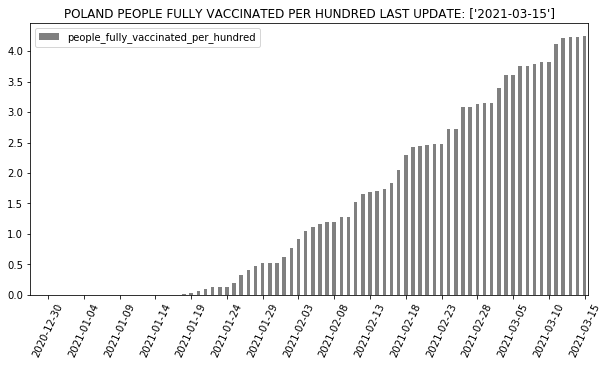

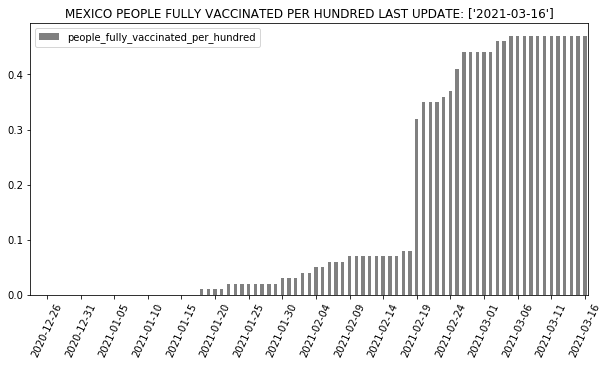

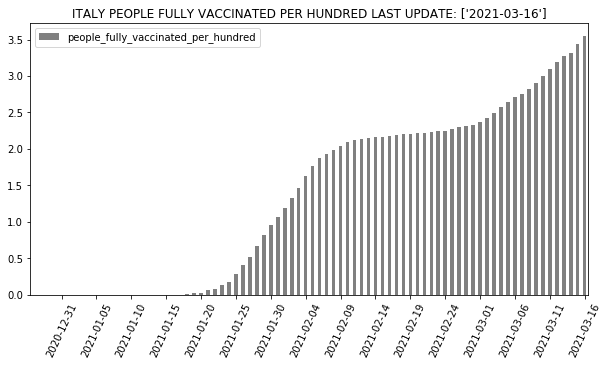

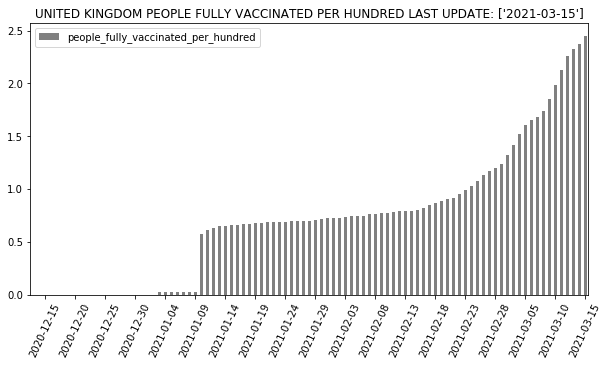

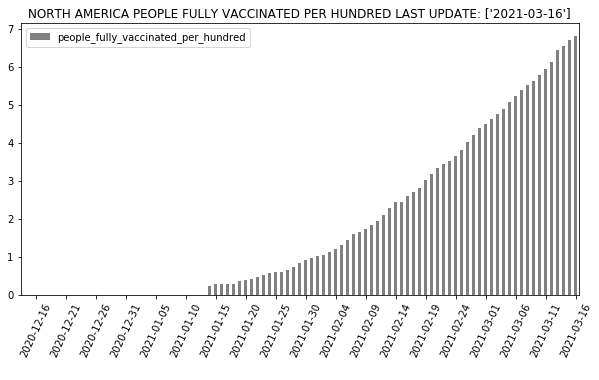

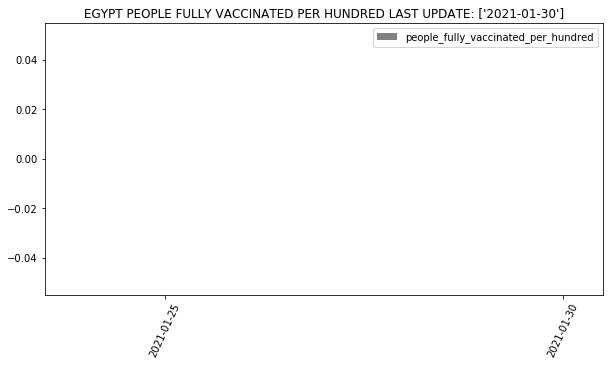

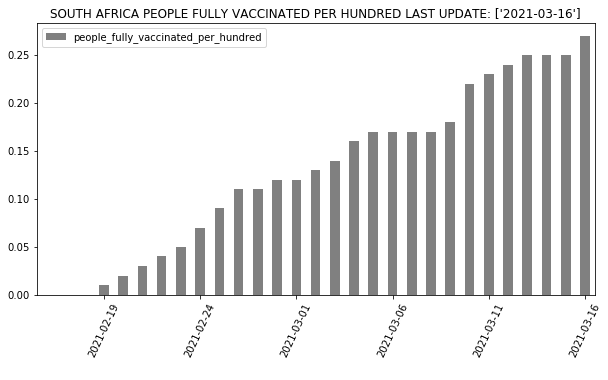

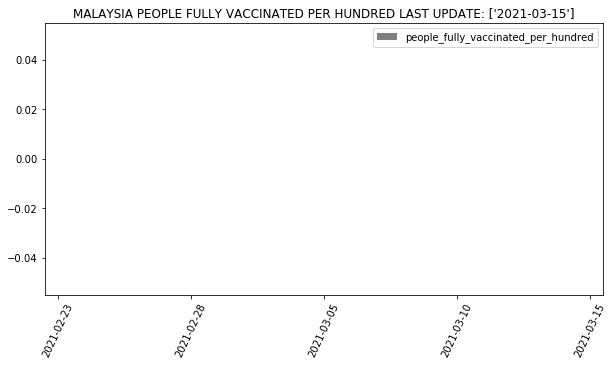

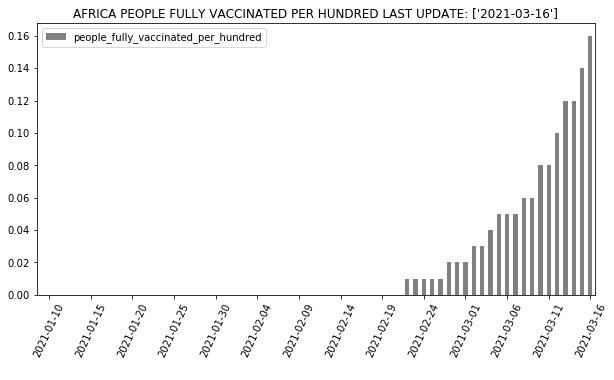

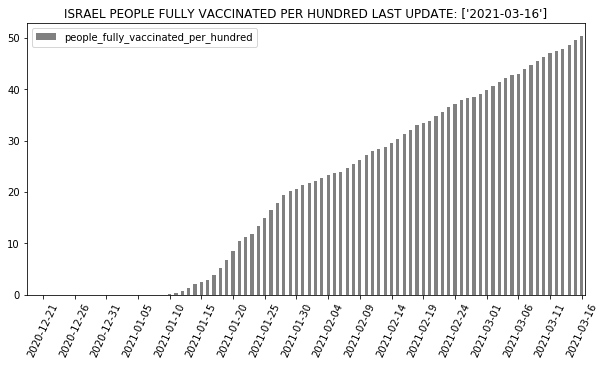

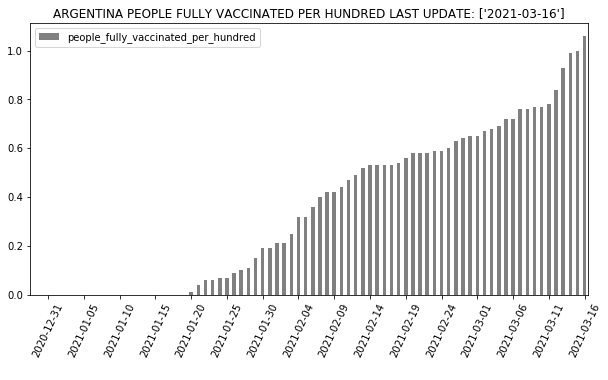

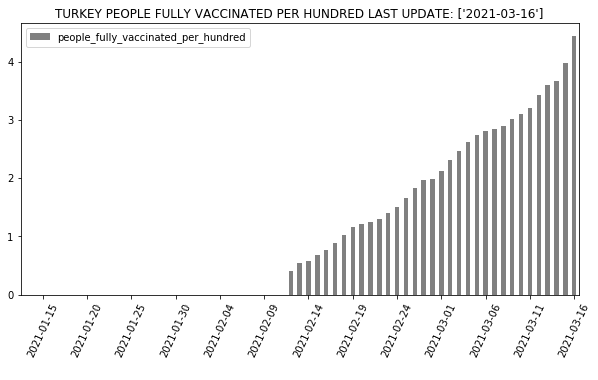

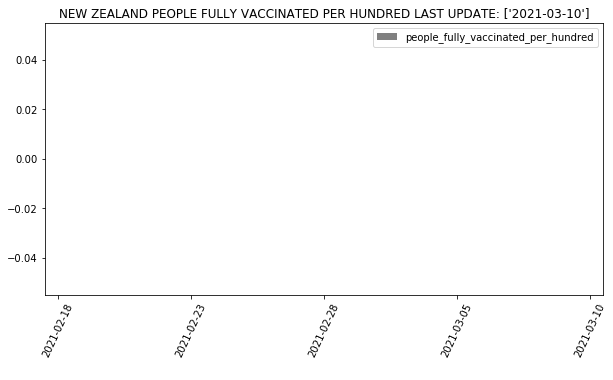

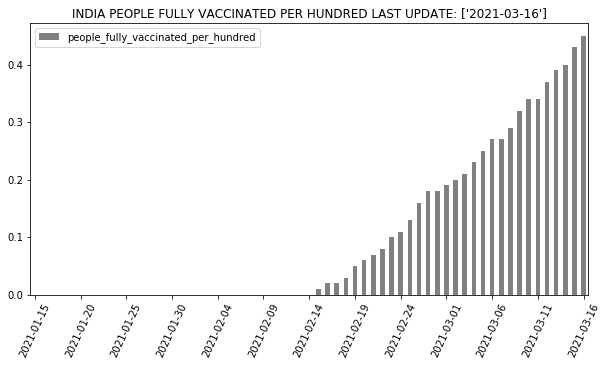

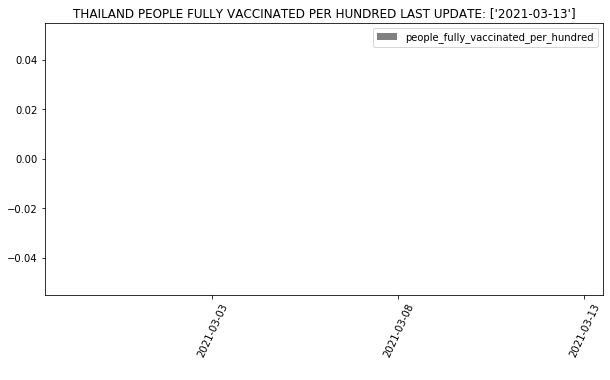

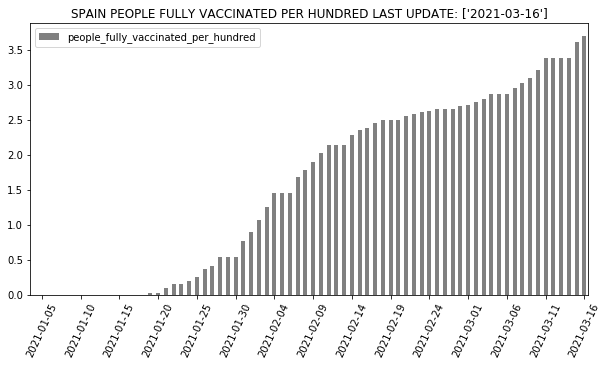

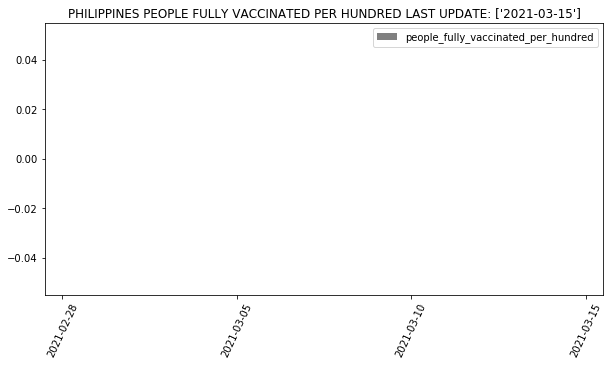

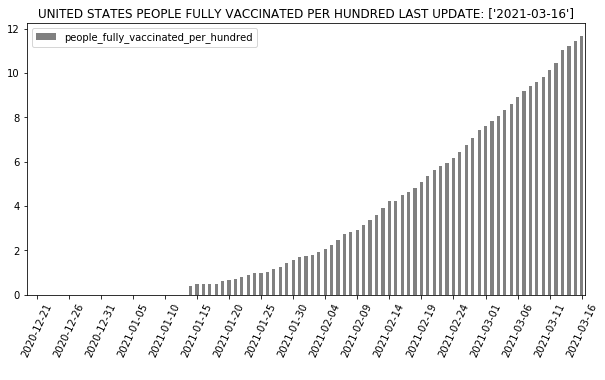

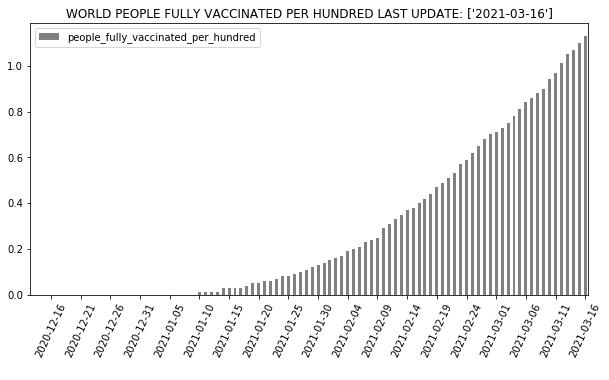

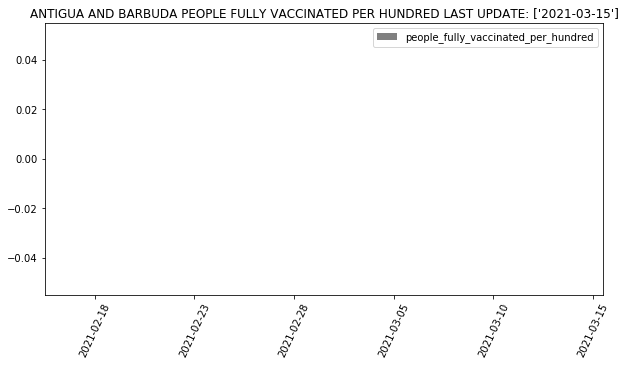

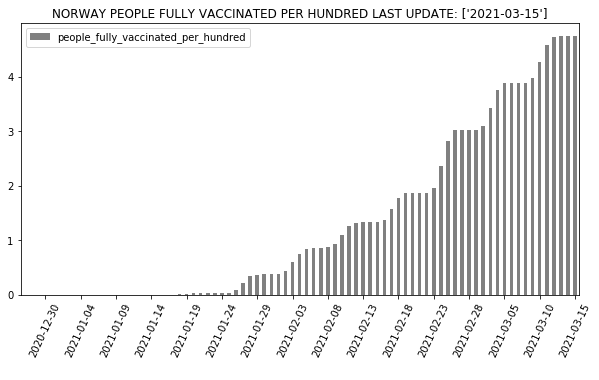

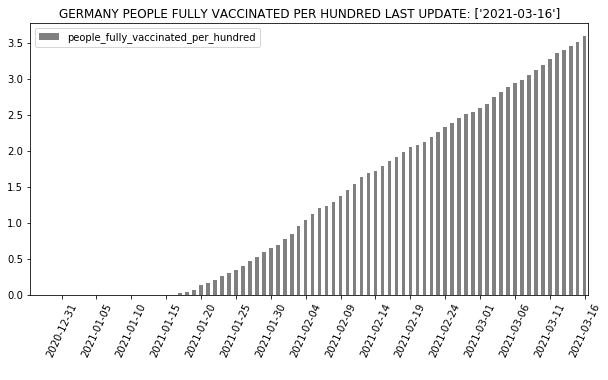

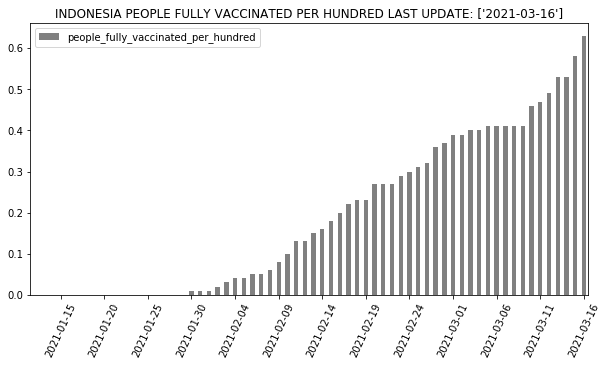

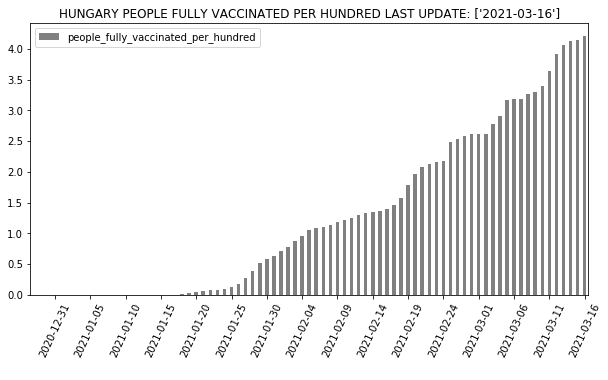

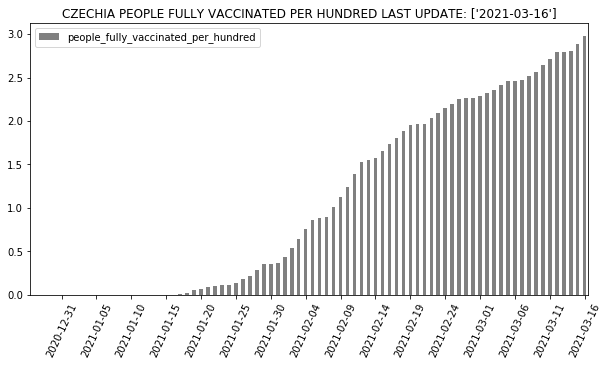

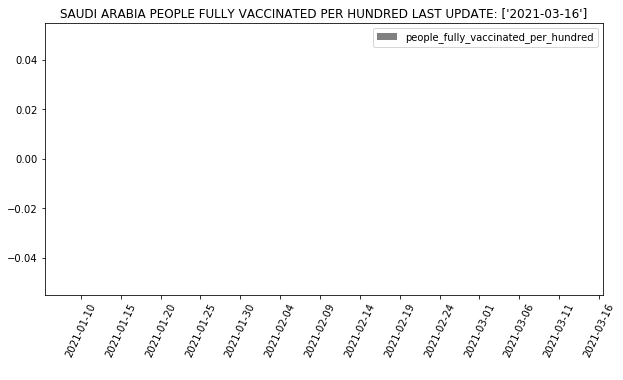

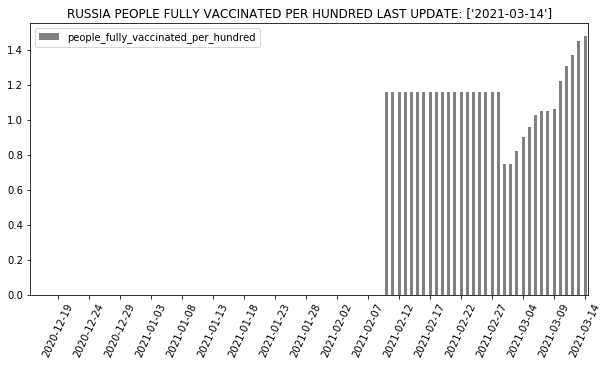

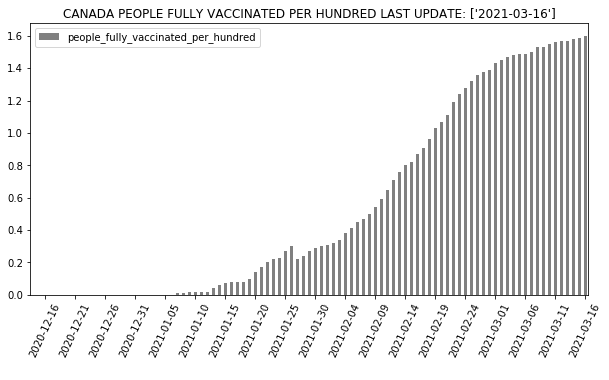

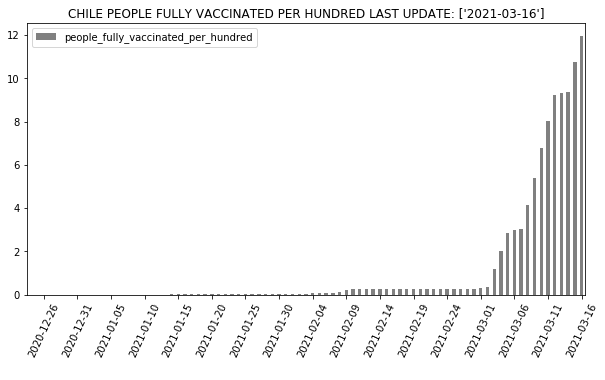

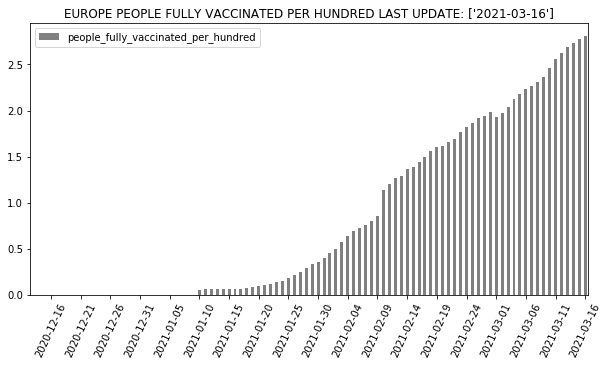

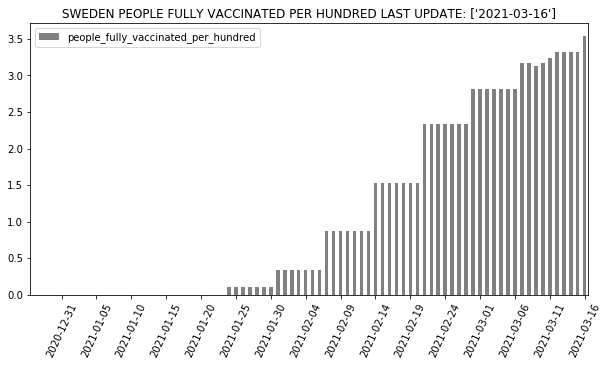

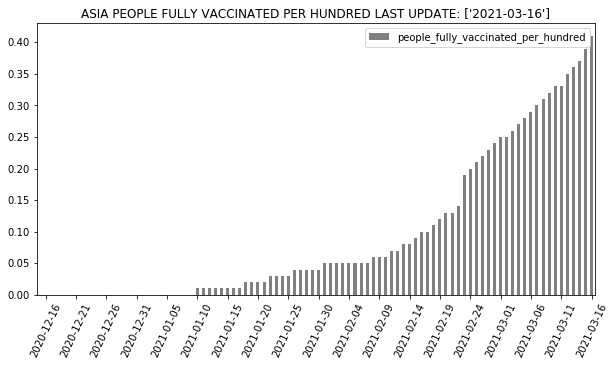

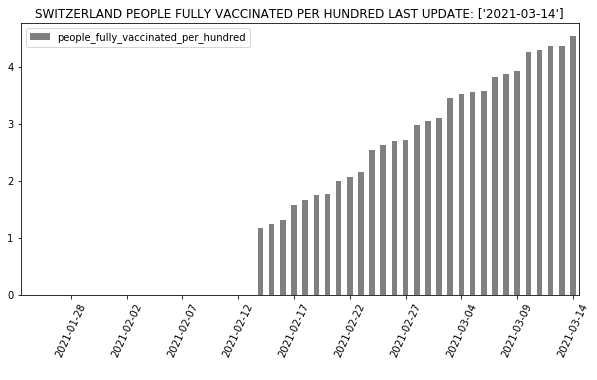

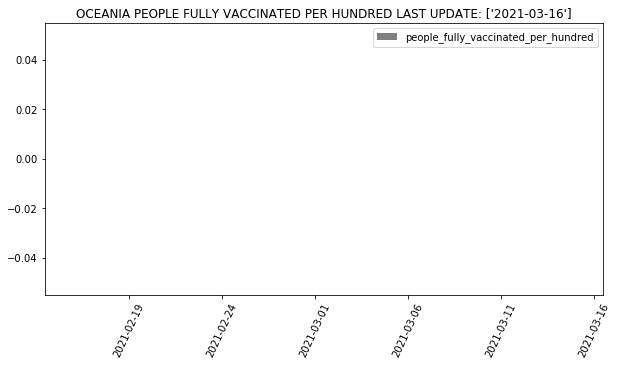

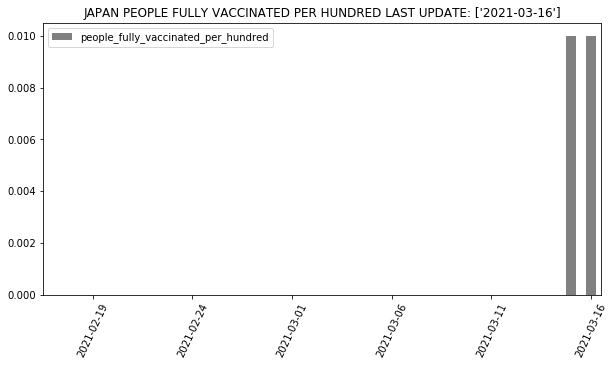

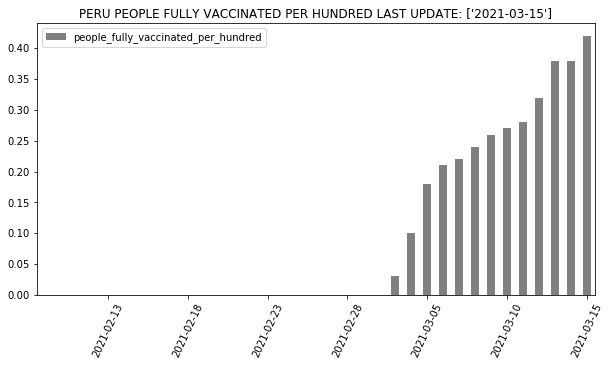

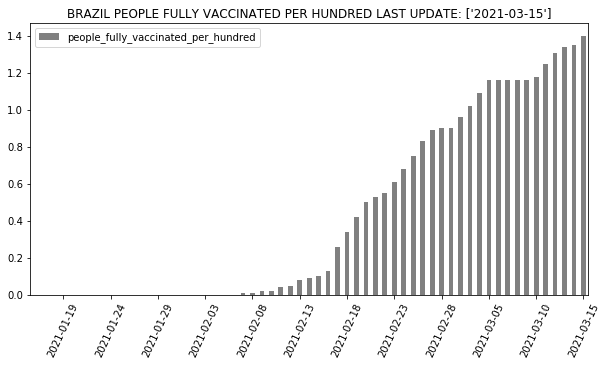

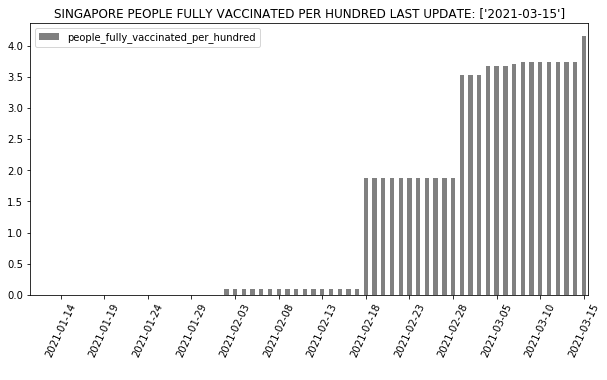

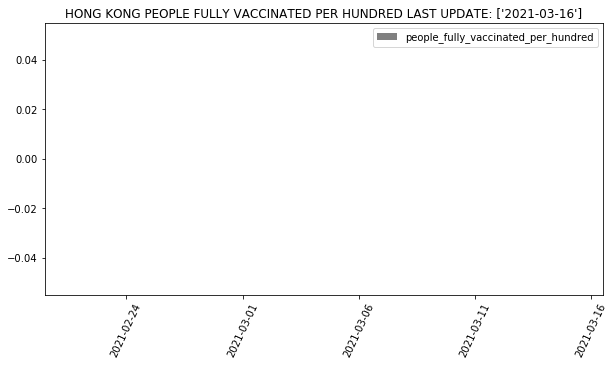

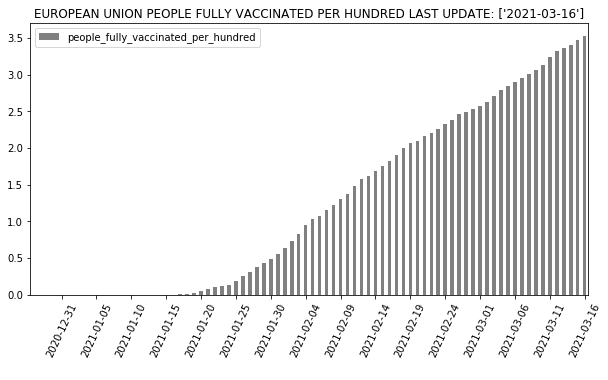

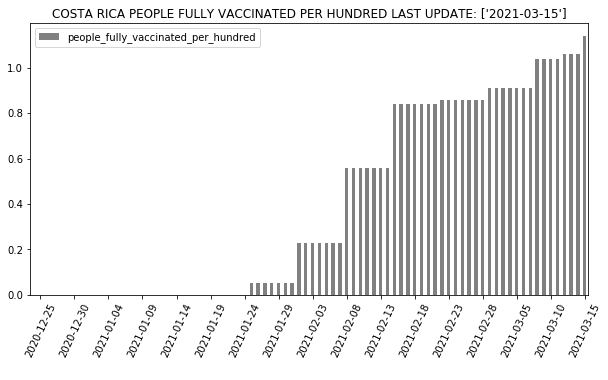

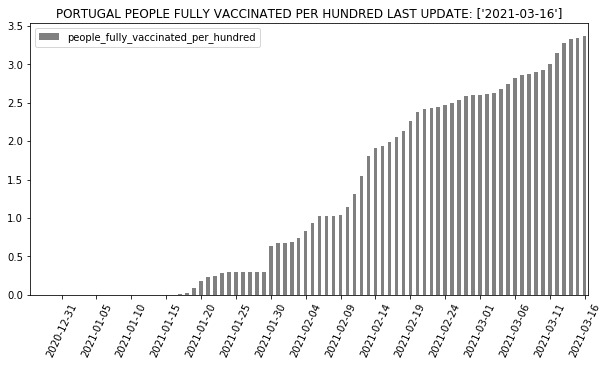

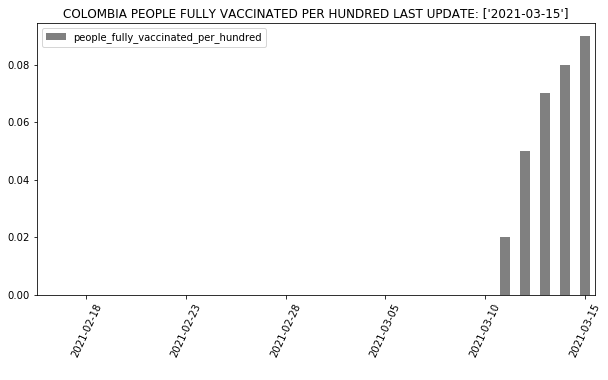

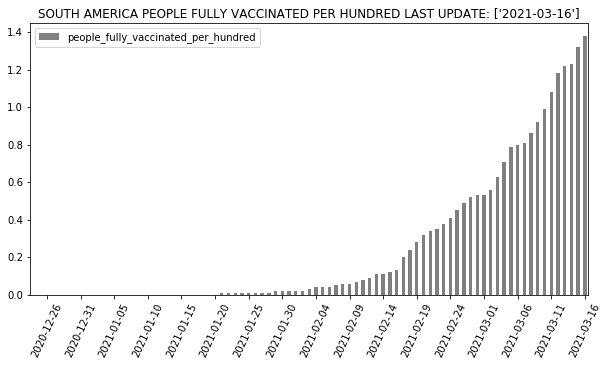

In [37]:
for item in mylist:
    ax = df_full[df_full.location == item].plot(kind = 'bar', x = 'date', y = 'people_fully_vaccinated_per_hundred', label = 'people_fully_vaccinated_per_hundred', color = 'gray', figsize = (10,5))
    ax.set_xlabel(' ');
    ax.tick_params(axis = 'x', rotation = 65);
    ax.set_title(item.upper() + ' PEOPLE FULLY VACCINATED PER HUNDRED'+' LAST UPDATE: '+ str(list(df[df.location == item].date.tail(1))))
    ax.set_xticks(ax.get_xticks()[::-5])
    ax.set_xticklabels(list(df_full[df_full.location == item].date[::-5]));

In [38]:
!jupyter nbconvert --to pdf –execute COVID_19_VACCINE_ROLLOUT.ipynb --output COV_19_VAX_ROLLOUT --no-input --ExecutePreprocessor.kernel_name=python --ExecutePreprocessor.timeout=-1

[NbConvertApp] WARNING | pattern '–execute' matched no files
[NbConvertApp] Converting notebook COVID_19_VACCINE_ROLLOUT.ipynb to pdf
[NbConvertApp] Support files will be in COV_19_VAX_ROLLOUT_files/
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory ./COV_19_VAX_ROLLOUT_files
[NbConvertApp] Making directory .

[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2149566 bytes to COV_19_VAX_ROLLOUT.pdf
